## I. Introduction

This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record
captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—
and relates them to academic performance, specifically the final exam score. The dataset is ideal for
educational machine learning applications, enabling learners to perform data preprocessing, visualization,
clustering, regression, and classification.

You are tasked with analyzing how these lifestyle factors affect student performance, and building predictive
models based on insights you derive.




## II. Project Goals

- Determine relationships between lifestyle habits and final exam scores  
- Discover meaningful student groupings based on lifestyle through clustering  
- Build and evaluate models that predict academic performance  
- Summarize and communicate findings through data storytelling




## III. Project Components

## 1. Problem Definition  
- Formulate a clear research question.



**Research Question:**  
- *How do various lifestyle habits such as study hours, sleep patterns, screen time, diet quality, and mental health influence student, and can these factors be used to accurately predict academic performance?*
- *Does a specific combination of healthy sleep, low screen time, and high study efficiency lead to significantly better academic outcomes than any factor alone?*
- *What distinct types of students emerge based on their habits and lifestyle, and how do these groups differ in academic performance?*

---



## 2. Data Understanding and Preprocessing


- Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
import warnings
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

- Load and Inspect the Dataset

In [ ]:
# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/PROJECT/student_habits_performance(in).csv"
df = pd.read_csv(file_path)

# Show first few rows
display(df.head())

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                 0.00                1.20   
1      S1001   20  Female                 6.90                2.80   
2      S1002   21    Male                 1.40                3.10   
3      S1003   23  Female                 1.00                3.90   
4      S1004   19  Female                 5.00                4.40   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0           1.10            No                  85.00         8.00   
1           2.30            No                  97.30         4.60   
2           1.30            No                  94.80         8.00   
3           1.00            No                  71.00         9.20   
4           0.50            No                  90.90         4.90   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes       56.20  
1                     8                            No      100.00  
2                     1                            No       34.30  
3                     1                           Yes       26.80  
4                     1                            No       66.40

- Dataset Overview



In [ ]:
summary = df.agg(['dtypes', 'count', 'nunique']).T
summary['Null Count'] = df.isnull().sum()
summary.columns = ['Data Type', 'Non-Null Count', 'Unique Values', 'Null Count']
display(summary)

Data Type Non-Null Count Unique Values  \
student_id                       object           1000          1000   
age                               int64           1000             8   
gender                           object           1000             3   
study_hours_per_day             float64           1000            78   
social_media_hours              float64           1000            60   
netflix_hours                   float64           1000            51   
part_time_job                    object           1000             2   
attendance_percentage           float64           1000           320   
sleep_hours                     float64           1000            68   
diet_quality                     object           1000             3   
exercise_frequency                int64           1000             7   
parental_education_level         object            909             3   
internet_quality                 object           1000             3   
mental_health_rating              int64           1000            10   
extracurricular_participation    object           1000             2   
exam_score                      float64           1000           480   

                               Null Count  
student_id                              0  
age                                     0  
gender                                  0  
study_hours_per_day                     0  
social_media_hours                      0  
netflix_hours                           0  
part_time_job                           0  
attendance_percentage                   0  
sleep_hours                             0  
diet_quality                            0  
exercise_frequency                      0  
parental_education_level               91  
internet_quality                        0  
mental_health_rating                    0  
extracurricular_participation           0  
exam_score                              0

- Handling Missing Data

In [ ]:
# Identify and sample nulls for columns with missing values
null_cols = df.columns[df.isnull().any()]

for col in null_cols:
    print(f"\n--- Nulls in '{col}' ---")
    display(df.loc[df[col].isnull(), [col]].sample(5, random_state=1))

# Show first 10 rows with any nulls
print("\n--- Rows with any null values ---")
display(df[df[null_cols].isnull().any(axis=1)].head(10))


--- Nulls in 'parental_education_level' ---


parental_education_level
637                      NaN
939                      NaN
497                      NaN
602                      NaN
782                      NaN


--- Rows with any null values ---


student_id  age  gender  study_hours_per_day  social_media_hours  \
10       S1010   19  Female                 4.60                3.70   
33       S1033   18  Female                 4.00                0.90   
47       S1047   23  Female                 2.50                2.90   
74       S1074   21  Female                 2.30                1.00   
93       S1093   22    Male                 4.10                2.50   
100      S1100   23    Male                 4.30                3.00   
102      S1102   18    Male                 4.30                4.00   
107      S1107   20    Male                 2.10                2.90   
115      S1115   20  Female                 3.70                1.20   
116      S1116   17    Male                 7.00                3.30   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10            0.80            No                  77.60         5.80   
33            1.10            No                  99.50         5.80   
47            2.70            No                  83.50         7.00   
74            0.40            No                 100.00         6.40   
93            3.00            No                  85.10         5.80   
100           1.50            No                 100.00         7.50   
102           0.80            No                 100.00         7.50   
107           1.40            No                  76.90         6.10   
115           3.30            No                  88.50         7.70   
116           3.10            No                  88.40         6.10   

    diet_quality  exercise_frequency parental_education_level  \
10          Fair                   1                      NaN   
33          Poor                   2                      NaN   
47          Good                   4                      NaN   
74          Fair                   6                      NaN   
93          Good                   4                      NaN   
100         Good                   5                      NaN   
102         Fair                   0                      NaN   
107         Fair                   4                      NaN   
115         Poor                   5                      NaN   
116         Good                   5                      NaN   

    internet_quality  mental_health_rating extracurricular_participation  \
10              Good                     3                            No   
33           Average                     5                            No   
47              Good                     8                           Yes   
74              Good                     1                            No   
93              Good                     5                            No   
100          Average                    10                           Yes   
102          Average                     1                            No   
107          Average                     7                            No   
115             Good                     9                            No   
116          Average                     6                           Yes   

     exam_score  
10        63.30  
33        70.70  
47        59.70  
74        66.90  
93        70.20  
100       93.20  
102       60.80  
107       60.40  
115       82.70  
116       94.80

In [ ]:
# Fill missing values and show updated counts
df['parental_education_level'].fillna('None', inplace=True)
print("Nulls after fill:", df['parental_education_level'].isnull().sum())
display(df['parental_education_level'].value_counts(dropna=False).to_frame('Count'))

Nulls after fill: 0


Count
parental_education_level       
High School                 392
Bachelor                    350
Master                      167
None                         91

- Categorical Values

In [ ]:
# 1. Label encode 'gender' as 0, 1, 2
df['gender'] = df['gender'].astype('category').cat.codes

# 2. Binary mapping 'Yes'/'No' to 1/0
df[['part_time_job', 'extracurricular_participation']] = df[['part_time_job', 'extracurricular_participation']].replace({'Yes': 1, 'No': 0})

# 3. Ordinal mappings (Custom Maps)
df['diet_quality'] = df['diet_quality'].replace({'Poor': 0, 'Fair': 1, 'Good': 2})
df['parental_education_level'] = df['parental_education_level'].replace({'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3})
df['internet_quality'] = df['internet_quality'].replace({'Poor': 0, 'Average': 1, 'Good': 2})

# 4. Summary
summary = df.agg(['count', 'nunique']).T.rename(columns={'count': 'Non-Null Count', 'nunique': 'Unique Values'})
summary['Data Type'] = df.dtypes
summary['Null Count'] = df.isnull().sum()
summary = summary[['Data Type', 'Non-Null Count', 'Null Count', 'Unique Values']]

print("Dataset Summary After Encoding:")
display(summary)

# 5. Preview updated DataFrame
print("First 5 Rows of Encoded Dataset:")
display(df.head())

Dataset Summary After Encoding:


Data Type  Non-Null Count  Null Count  \
student_id                       object            1000           0   
age                               int64            1000           0   
gender                             int8            1000           0   
study_hours_per_day             float64            1000           0   
social_media_hours              float64            1000           0   
netflix_hours                   float64            1000           0   
part_time_job                     int64            1000           0   
attendance_percentage           float64            1000           0   
sleep_hours                     float64            1000           0   
diet_quality                      int64            1000           0   
exercise_frequency                int64            1000           0   
parental_education_level          int64            1000           0   
internet_quality                  int64            1000           0   
mental_health_rating              int64            1000           0   
extracurricular_participation     int64            1000           0   
exam_score                      float64            1000           0   

                               Unique Values  
student_id                              1000  
age                                        8  
gender                                     3  
study_hours_per_day                       78  
social_media_hours                        60  
netflix_hours                             51  
part_time_job                              2  
attendance_percentage                    320  
sleep_hours                               68  
diet_quality                               3  
exercise_frequency                         7  
parental_education_level                   4  
internet_quality                           3  
mental_health_rating                      10  
extracurricular_participation              2  
exam_score                               480

First 5 Rows of Encoded Dataset:


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23       0                 0.00                1.20   
1      S1001   20       0                 6.90                2.80   
2      S1002   21       1                 1.40                3.10   
3      S1003   23       0                 1.00                3.90   
4      S1004   19       0                 5.00                4.40   

   netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0           1.10              0                  85.00         8.00   
1           2.30              0                  97.30         4.60   
2           1.30              0                  94.80         8.00   
3           1.00              0                  71.00         9.20   
4           0.50              0                  90.90         4.90   

   diet_quality  exercise_frequency  parental_education_level  \
0             1                   6                         3   
1             2                   6                         1   
2             0                   1                         1   
3             0                   4                         3   
4             1                   3                         3   

   internet_quality  mental_health_rating  extracurricular_participation  \
0                 1                     8                              1   
1                 1                     8                              0   
2                 0                     1                              0   
3                 2                     1                              1   
4                 2                     1                              0   

   exam_score  
0       56.20  
1      100.00  
2       34.30  
3       26.80  
4       66.40

- Scaling

In [ ]:

# 1. Separate 'student_id' from the rest
student_ids = df['student_id']
features = df.drop(columns=['student_id'])

# 2. Scale only the feature columns
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 3. Display the first few rows of scaled data
print("Scaled feature data (excluding 'student_id'):")
display(scaled_features.head())

Scaled feature data (excluding 'student_id'):


age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.08   -0.98                -2.42               -1.11          -0.67   
1 -0.22   -0.98                 2.28                0.25           0.45   
2  0.22    0.76                -1.46                0.51          -0.48   
3  1.08   -0.98                -1.74                1.19          -0.76   
4 -0.65   -0.98                 0.99                1.62          -1.23   

   part_time_job  attendance_percentage  sleep_hours  diet_quality  \
0          -0.52                   0.09         1.25         -0.27   
1          -0.52                   1.40        -1.53          1.11   
2          -0.52                   1.14         1.25         -1.65   
3          -0.52                  -1.40         2.23         -1.65   
4          -0.52                   0.72        -1.28         -0.27   

   exercise_frequency  parental_education_level  internet_quality  \
0                1.46                      1.62             -0.39   
1                1.46                     -0.68             -0.39   
2               -1.01                     -0.68             -1.77   
3                0.47                      1.62              0.98   
4               -0.02                      1.62              0.98   

   mental_health_rating  extracurricular_participation  exam_score  
0                  0.90                           1.46       -0.79  
1                  0.90                          -0.68        1.80  
2                 -1.56                          -0.68       -2.09  
3                 -1.56                           1.46       -2.54  
4                 -1.56                          -0.68       -0.19

- Engineer New Features

In [ ]:
# Feature Engineering (on scaled features)
scaled_features['total_screen_time'] = scaled_features['social_media_hours'] + scaled_features['netflix_hours']
scaled_features['study_efficiency'] = (scaled_features['study_hours_per_day'] + scaled_features['attendance_percentage']
)
scaled_features['total_well-being'] = scaled_features['exercise_frequency'] + scaled_features['mental_health_rating']+ scaled_features['sleep_hours']

# Combine back with student IDs
final_df = pd.concat([student_ids, scaled_features], axis=1)

# Display first few rows of new features
print("Engineered Features on Scaled Data:")
display(scaled_features[[
    'total_screen_time', 'study_efficiency', 'total_well-being',
]].head())


Engineered Features on Scaled Data:


total_screen_time  study_efficiency  total_well-being
0              -1.78             -2.33              3.61
1               0.70              3.68              0.84
2               0.02             -0.33             -1.32
3               0.43             -3.13              1.14
4               0.39              1.71             -2.86

---

## 3. Exploratory Data Analysis

- Histograms for Feature Distributions

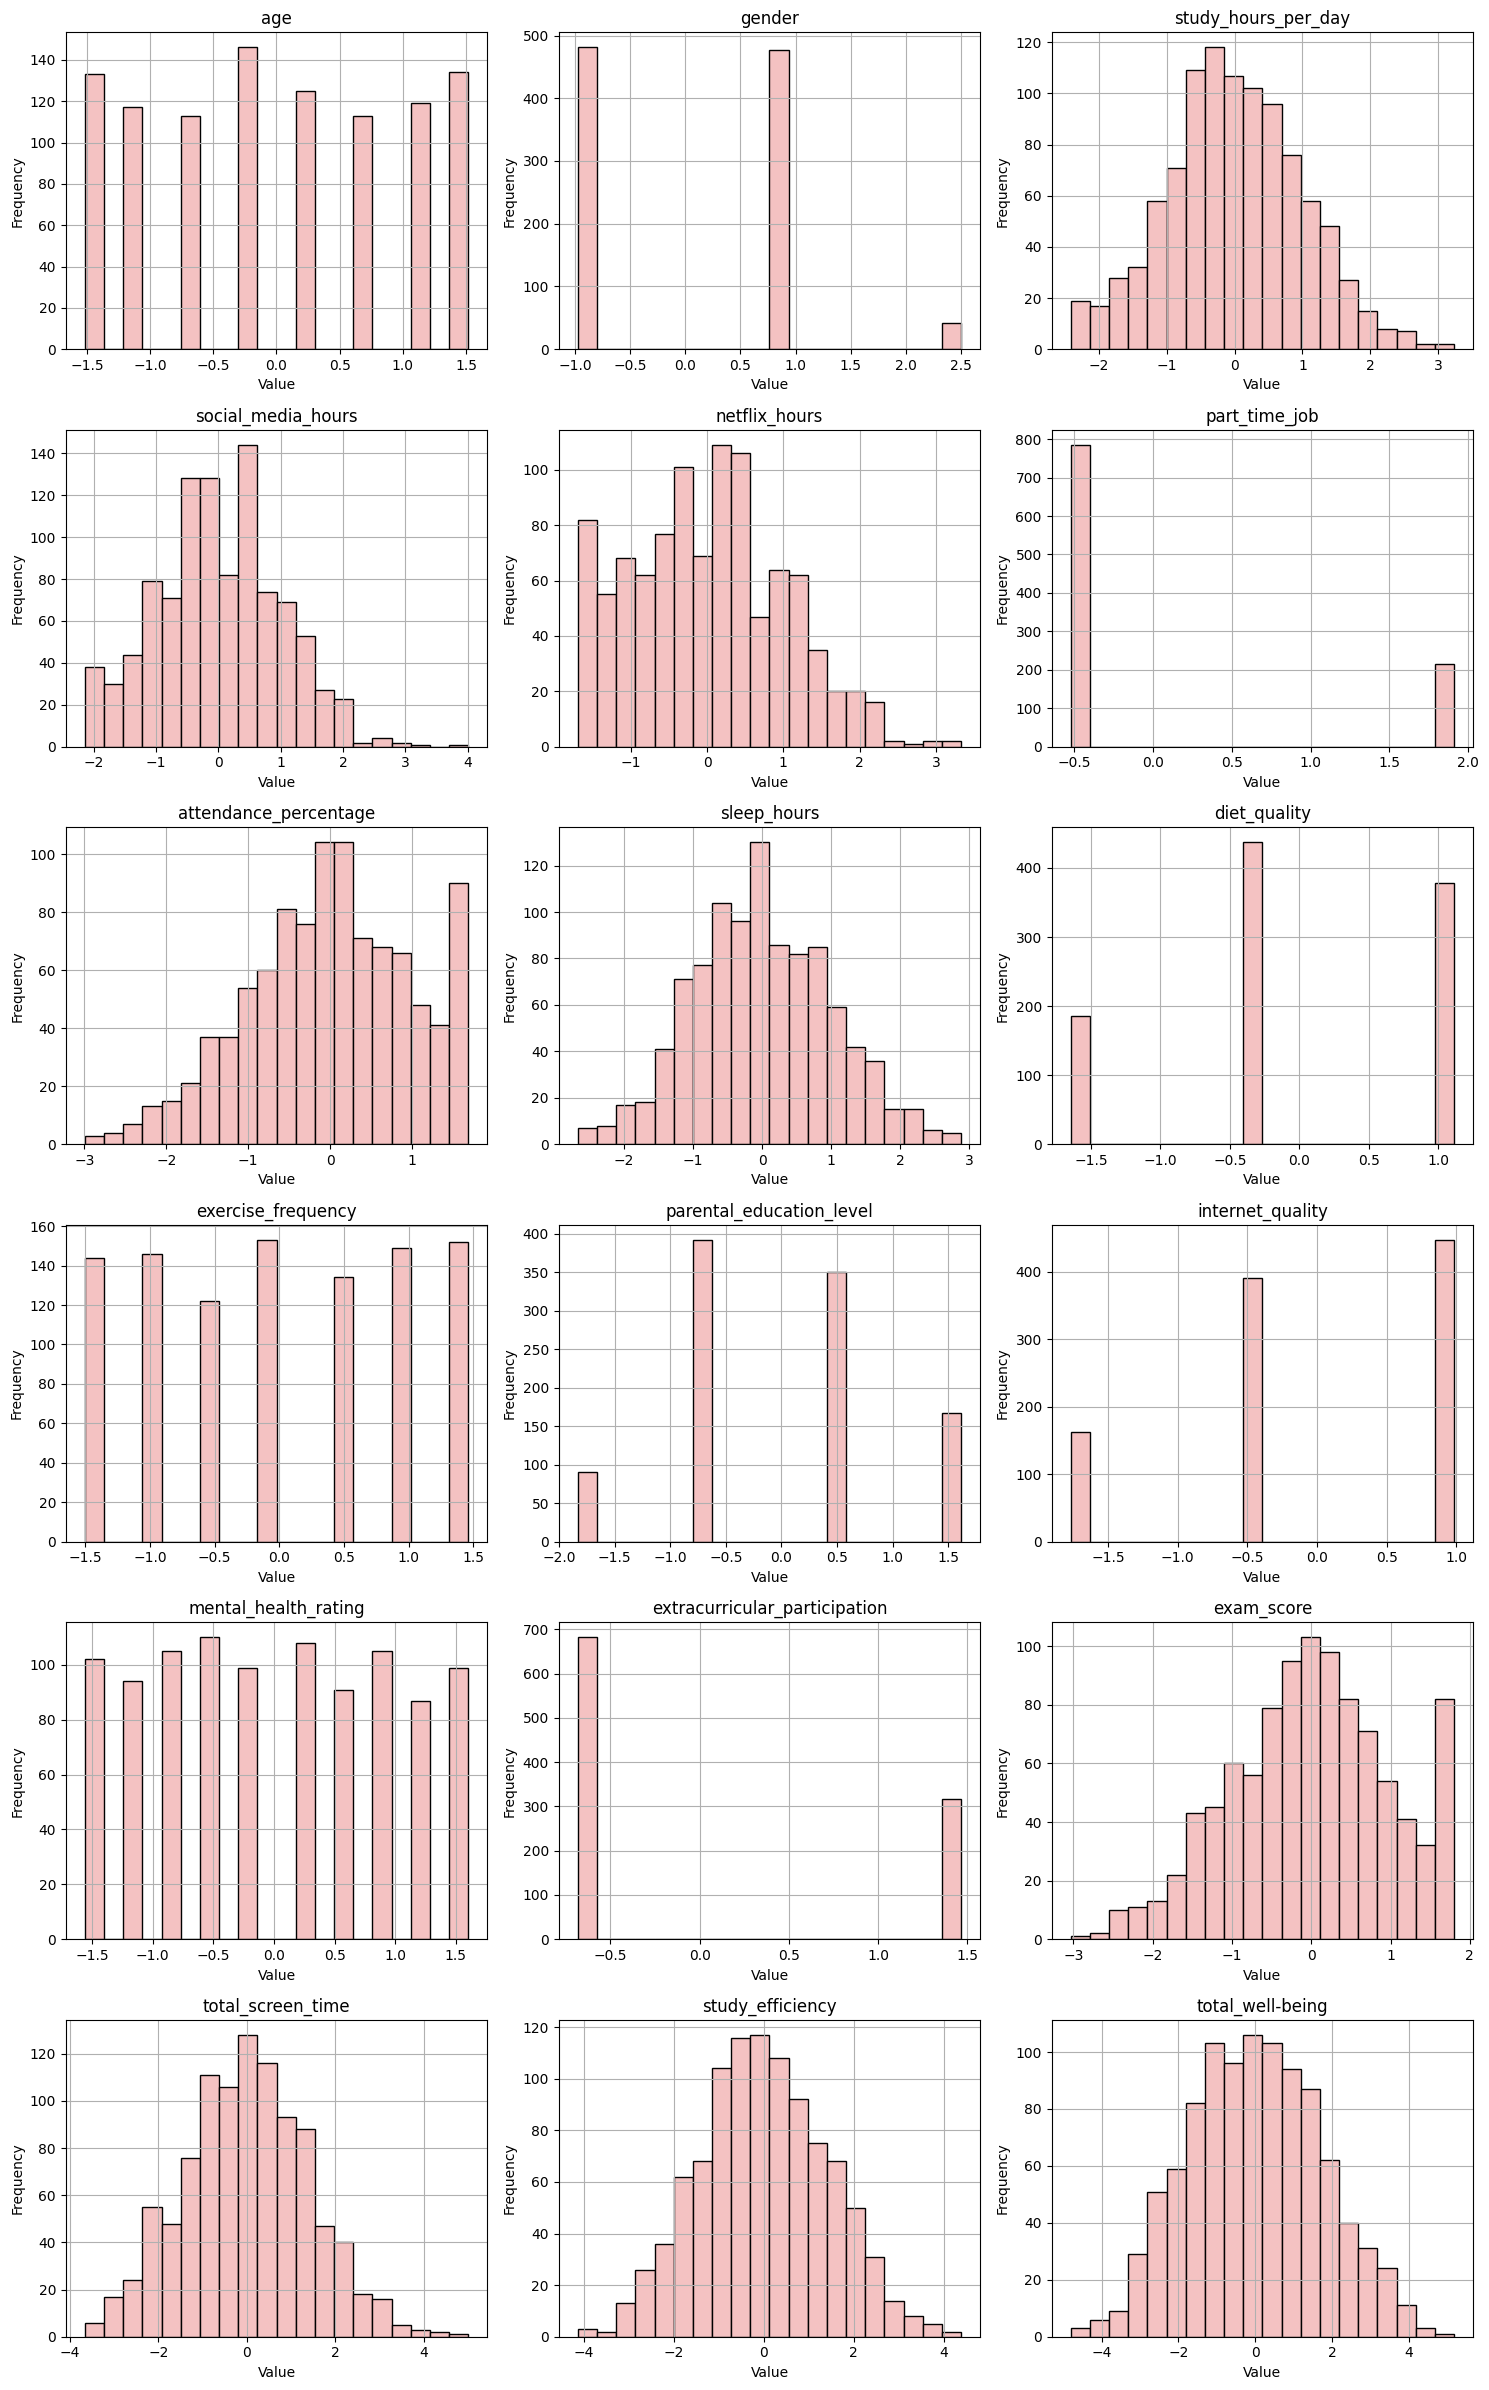

In [ ]:
# Filter columns with valid numeric values
valid_columns = [
    col for col in scaled_features.columns
    if np.isfinite(scaled_features[col]).all() and not scaled_features[col].isnull().all()
]

# Grid dimensions
cols = 3
rows = math.ceil(len(valid_columns) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Pastel red color
pastel_red = '#F4C2C2'

# Plot histograms
for i, col in enumerate(valid_columns):
    axes[i].hist(scaled_features[col].dropna(), bins=20, edgecolor='black', color=pastel_red)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- **Scatter Plots Comparing Habits vs. Scores**

- Trends in Exam Scores Across Numerical Indicators

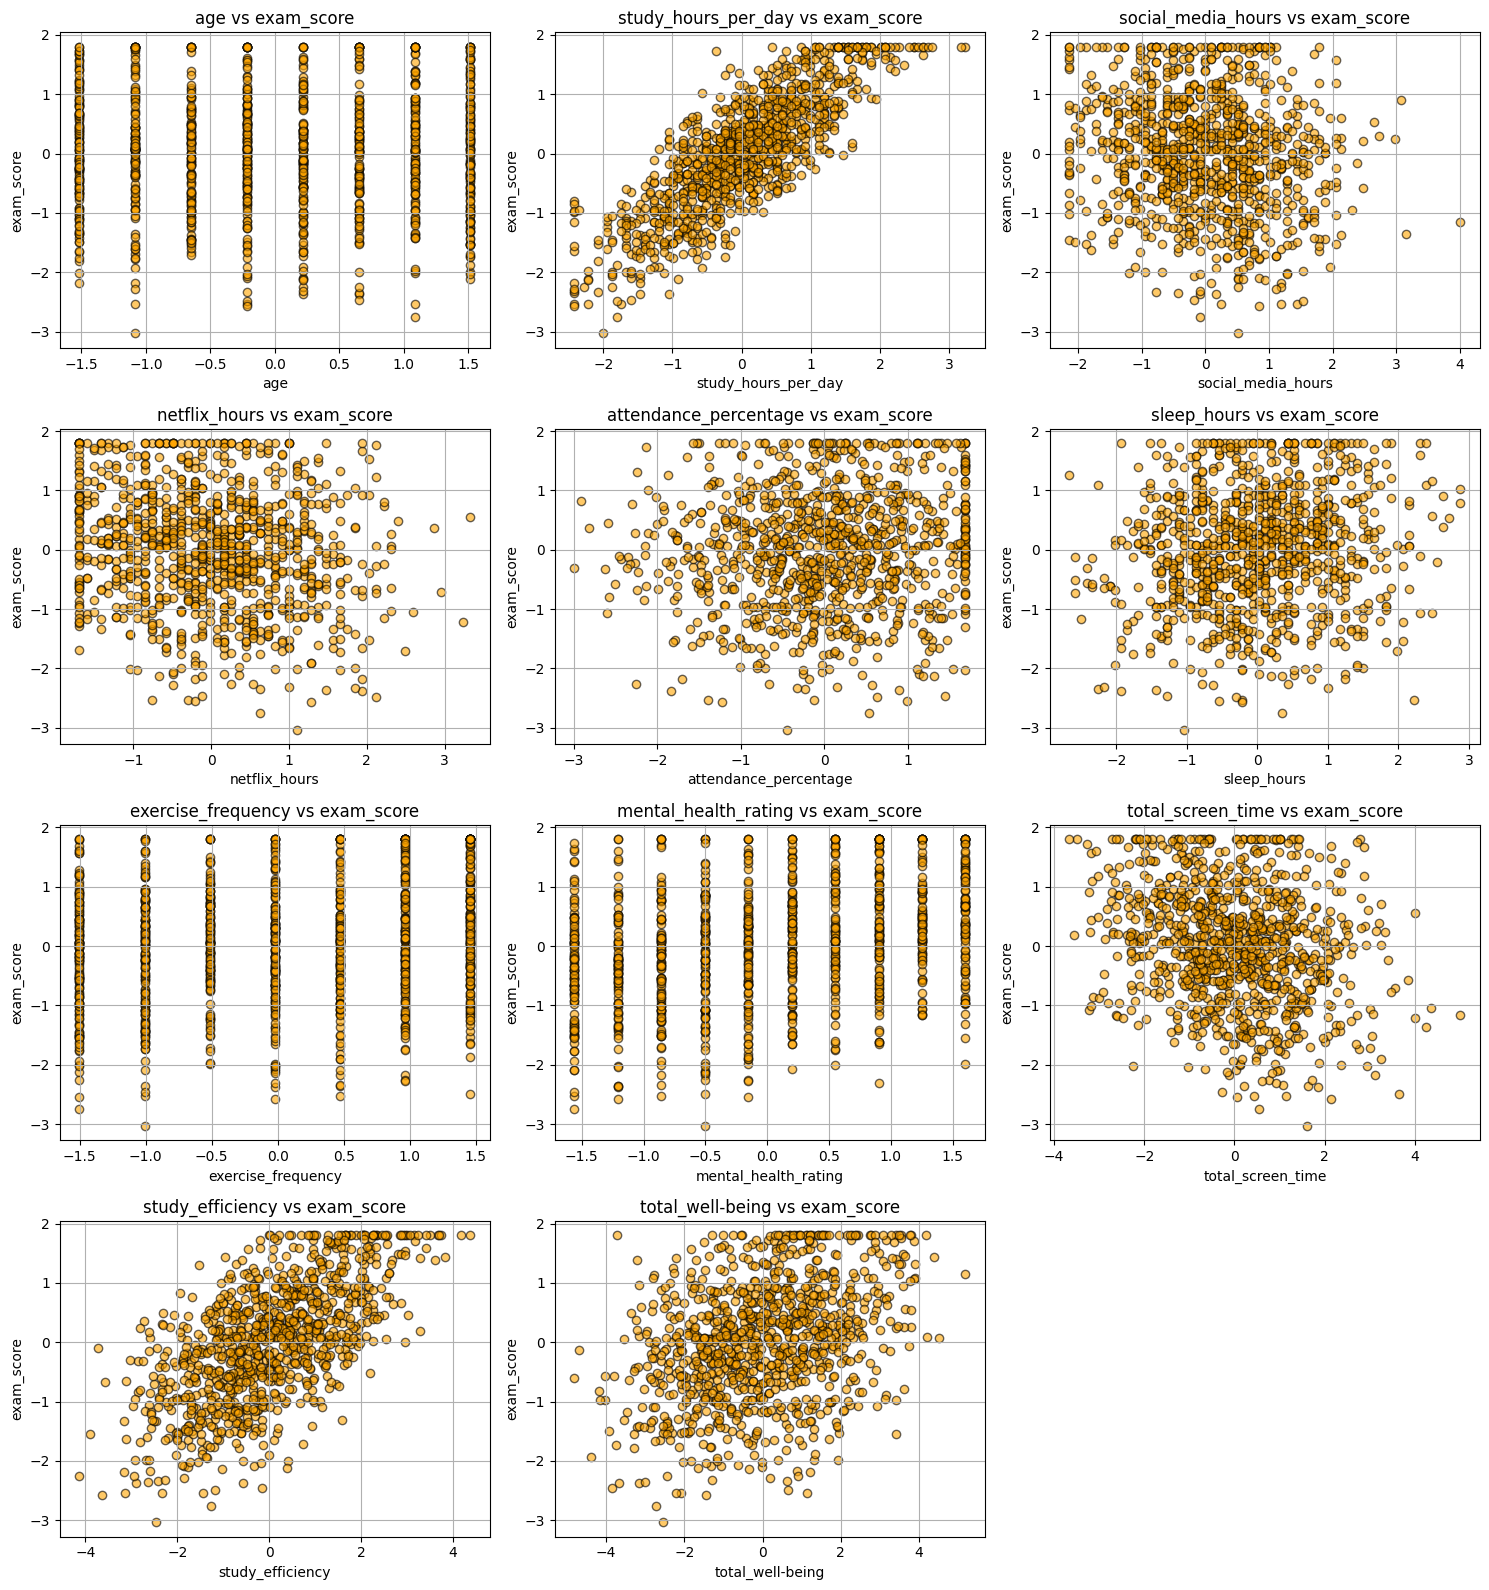

In [ ]:
# Define target and known categorical columns
target = 'exam_score'
categorical_cols = [
    'gender', 'part_time_job', 'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation'
]

# Remove encoded categorical columns from features
features = [col for col in scaled_features.columns if col not in categorical_cols + [target]]

# Plot setup
rows, cols = math.ceil(len(features) / 3), 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()
orange = '#FFA500'

# Scatter plots for numerical features
for i, feat in enumerate(features):
    axes[i].scatter(scaled_features[feat], scaled_features[target], alpha=0.6, color=orange, edgecolor='black')
    axes[i].set(title=f'{feat} vs {target}', xlabel=feat, ylabel=target)
    axes[i].grid(True)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Trends in Exam Scores Across Categorical Indicators

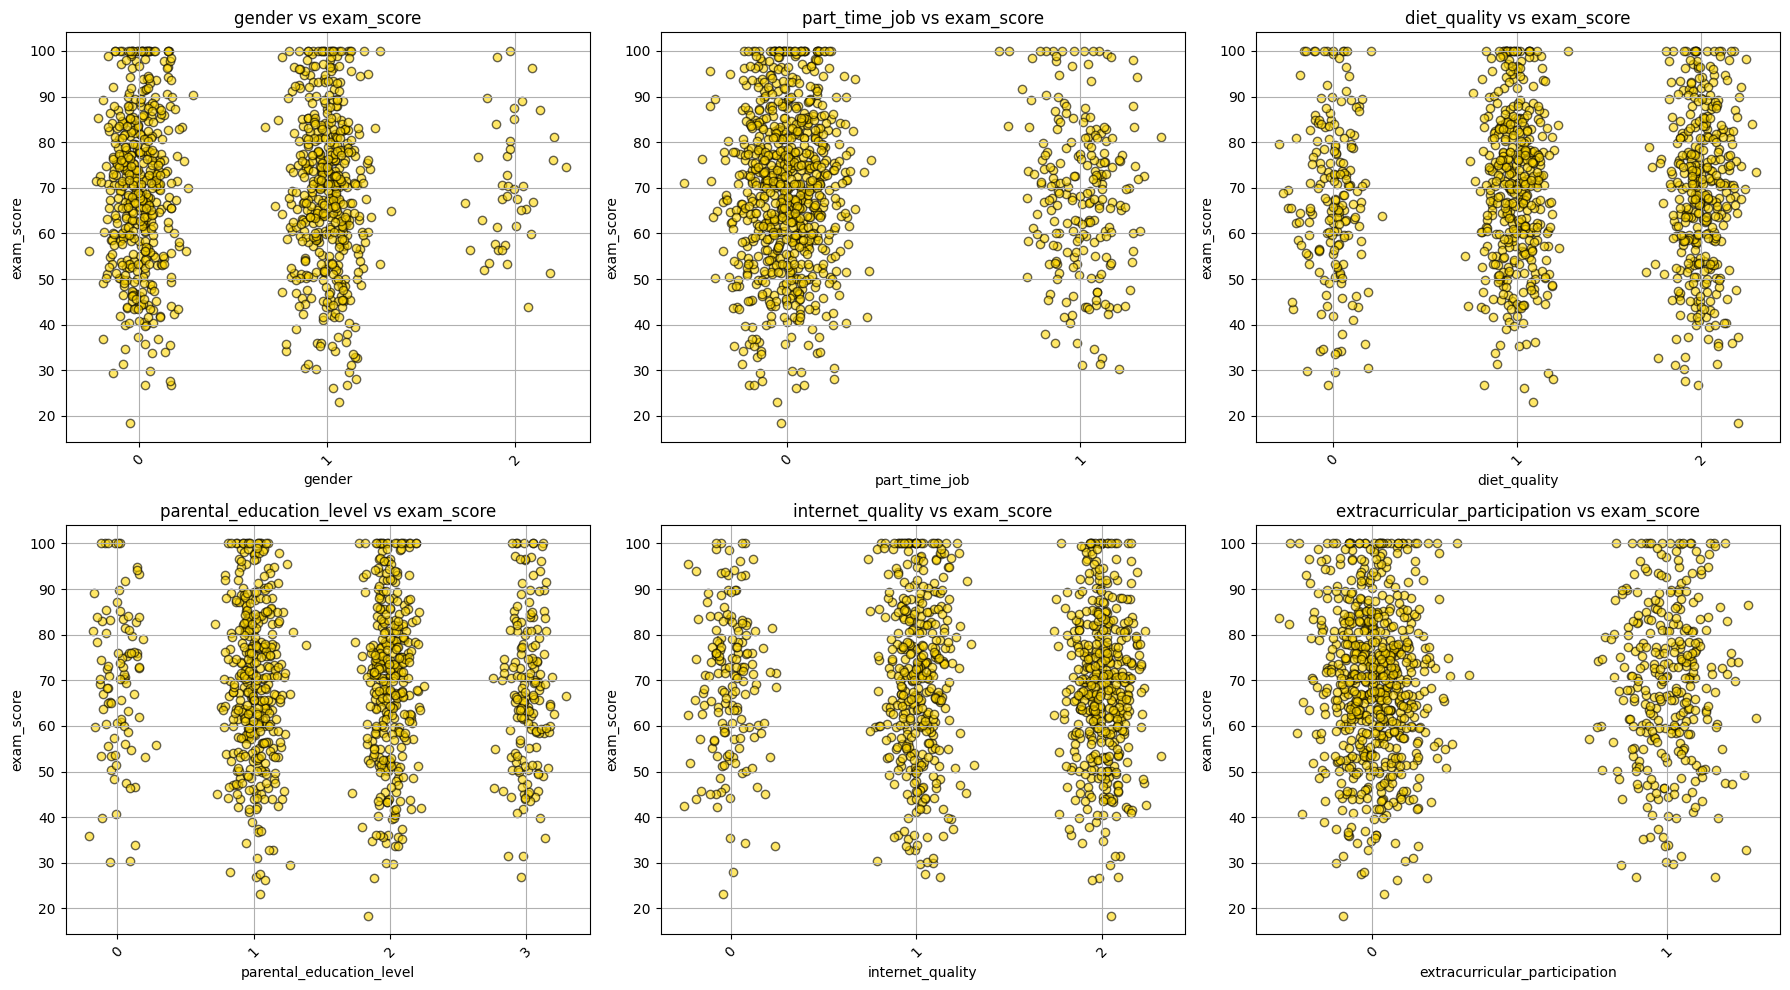

In [ ]:
# Set the target
target = 'exam_score'

# Identify categorical features
categorical_features = [
    'gender', 'part_time_job', 'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation'
]

# Set up the plot grid
cols = 3
rows = int(np.ceil(len(categorical_features) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

# Create scatter plots with jitter
for i, cat in enumerate(categorical_features):
    cat_series = df[cat].astype('category')
    cat_codes = cat_series.cat.codes
    cat_labels = cat_series.cat.categories
    x = cat_codes + np.random.normal(0, 0.1, size=len(df))
    y = df[target]

    axes[i].scatter(x, y, alpha=0.6, edgecolor='black', color='gold')
    axes[i].set_title(f'{cat} vs {target}')
    axes[i].set_xlabel(cat)
    axes[i].set_ylabel(target)
    axes[i].set_xticks(np.arange(len(cat_labels)))
    axes[i].set_xticklabels(cat_labels, rotation=45)
    axes[i].grid(True)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Box Plot Comparing Habits vs. Scores

- Trends in Exam Scores Across Numerical Indicators

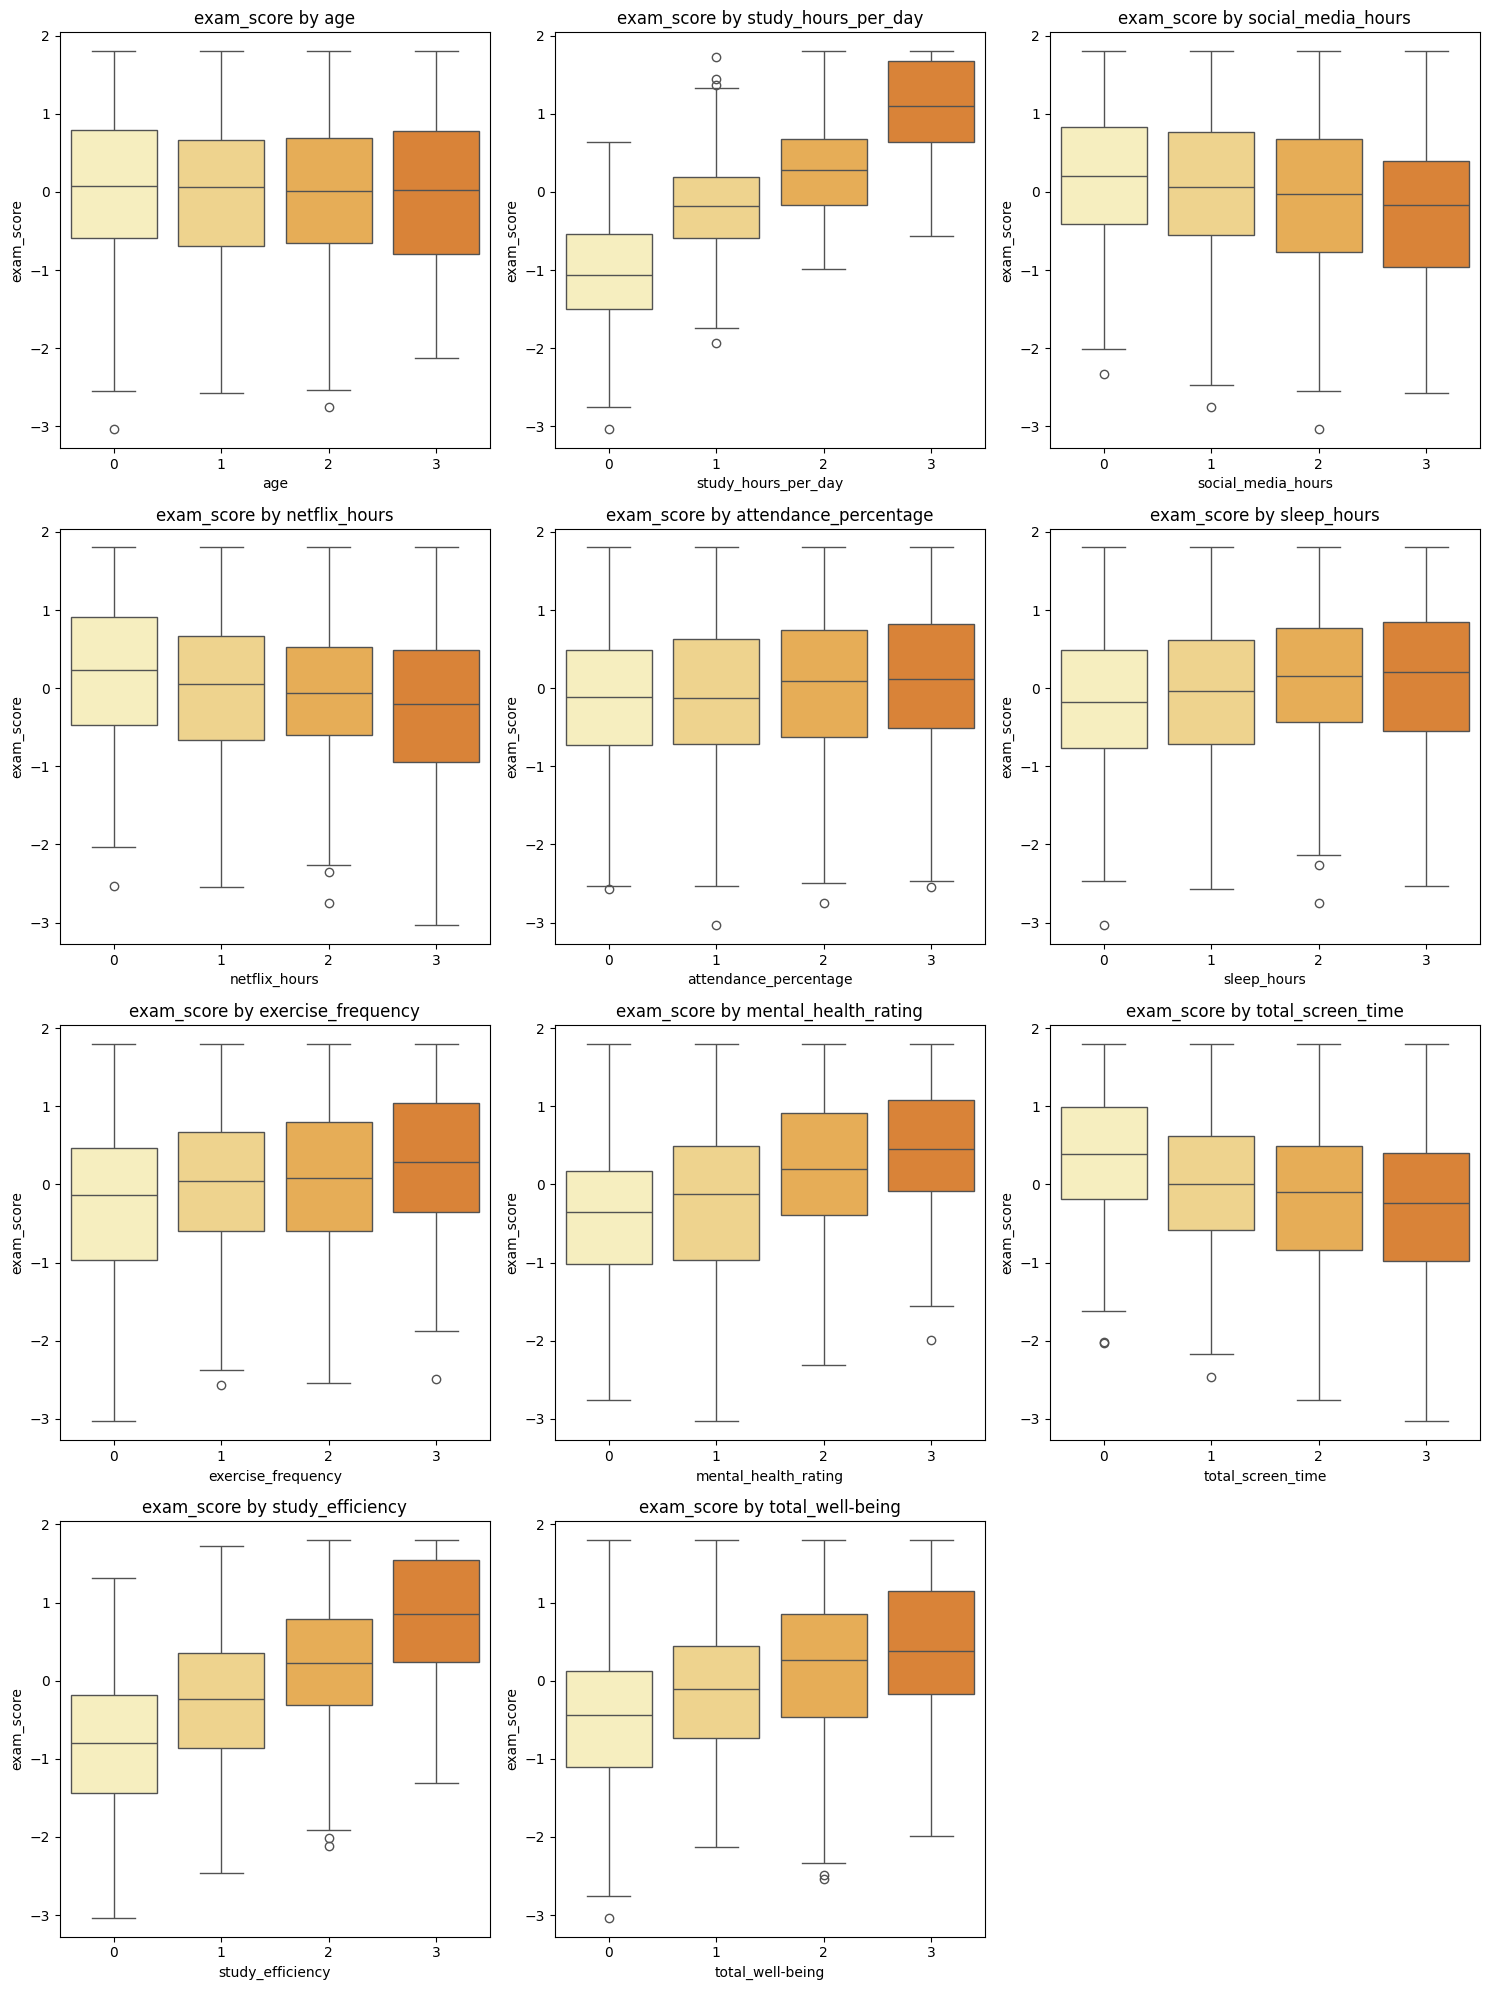

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Define target and columns to exclude
target = 'exam_score'
exclude = ['student_id', 'cluster', 'cluster_label', target,
           'gender', 'part_time_job', 'diet_quality',
           'parental_education_level', 'internet_quality', 'extracurricular_participation']

# Select numeric features only
numeric_features = [col for col in scaled_features.columns
                    if col not in exclude and pd.api.types.is_numeric_dtype(scaled_features[col])]

# Plot setup
cols, rows = 3, math.ceil(len(numeric_features) / 3)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

# Boxplots
for i, feat in enumerate(numeric_features):
    uniq = scaled_features[feat].nunique()
    binned = pd.qcut(scaled_features[feat], q=4, labels=False, duplicates='drop') if uniq >= 4 else \
             pd.cut(scaled_features[feat], bins=uniq, labels=False) if uniq >= 3 else scaled_features[feat]
    sns.boxplot(x=binned, y=scaled_features[target], ax=axes[i],
                palette=sns.color_palette("YlOrBr"), hue=binned, legend=False)
    axes[i].set(title=f'{target} by {feat}', xlabel=feat, ylabel=target)

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Trends in Exam Scores Across Categorical Indicators

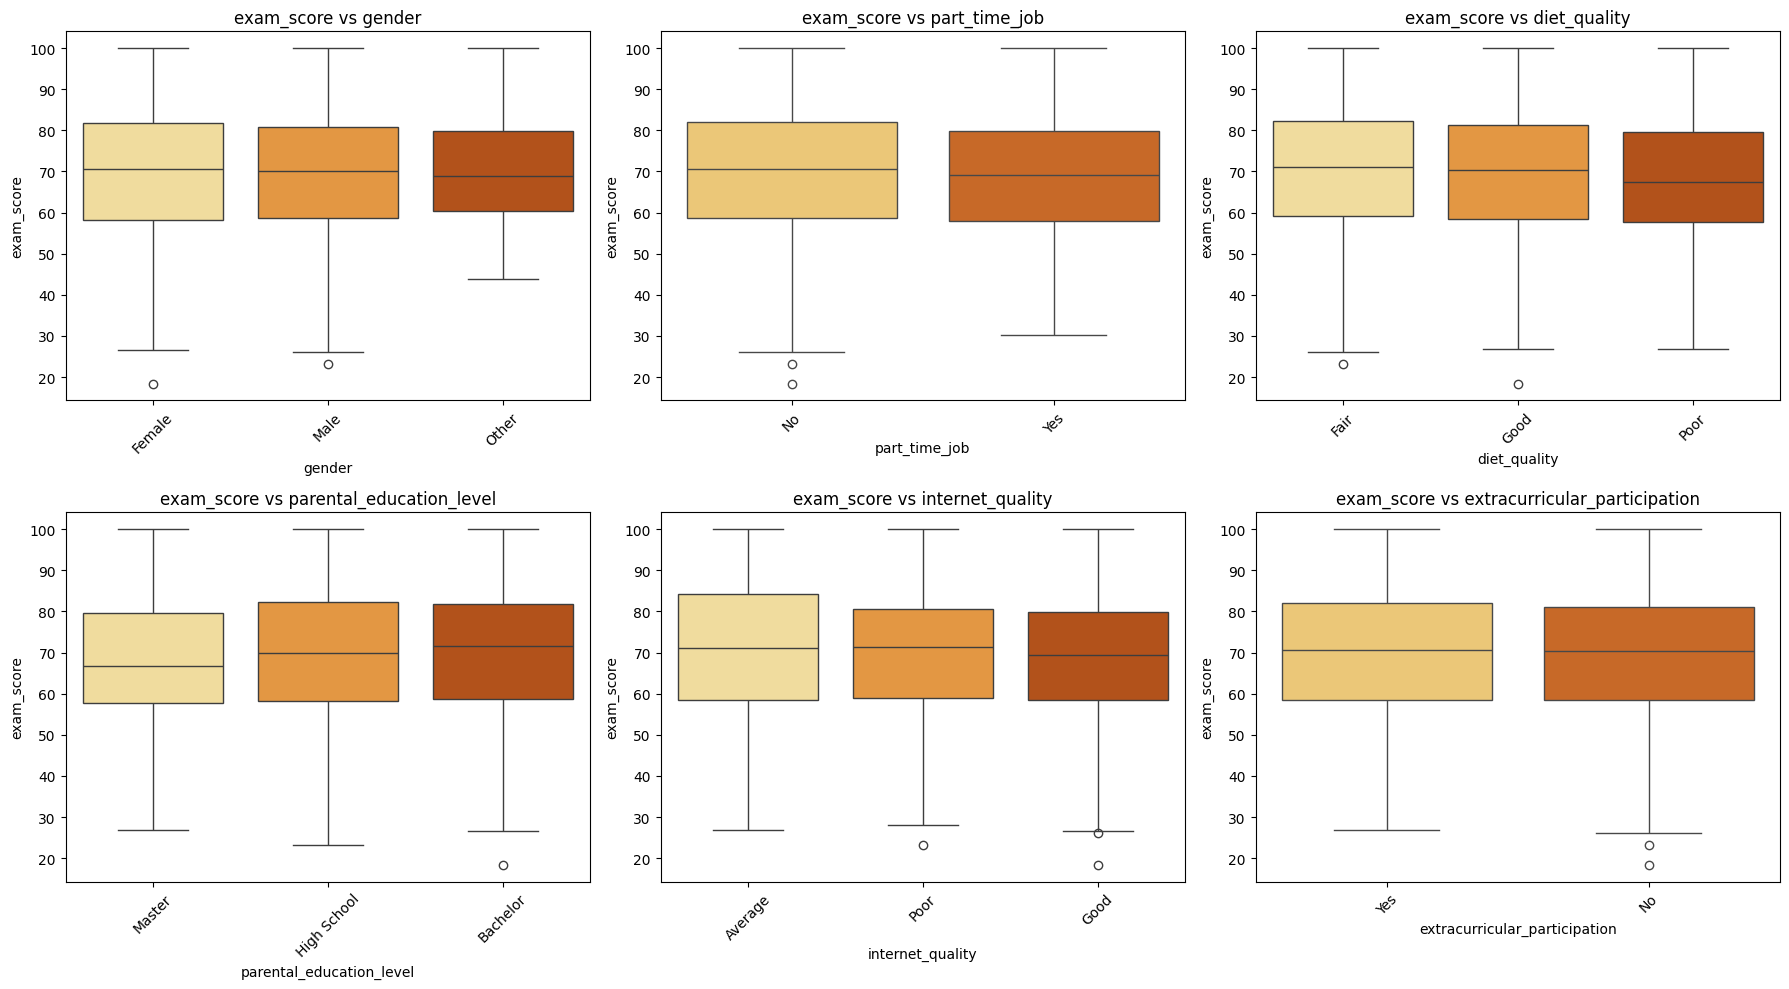

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load data and define target
df = pd.read_csv('/content/drive/MyDrive/PROJECT/student_habits_performance(in).csv')
target = 'exam_score'

# Get categorical features (excluding ID)
cat_features = df.select_dtypes(include=['object', 'category']).drop(columns='student_id', errors='ignore').columns

# Plot setup
cols, rows = 3, math.ceil(len(cat_features) / 3)
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

# Boxplots
for i, col in enumerate(cat_features):
    sns.boxplot(x=col, y=target, data=df, ax=axes[i], palette='YlOrBr')
    axes[i].set_title(f'{target} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)

# Clean up
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Correlation Heat Map

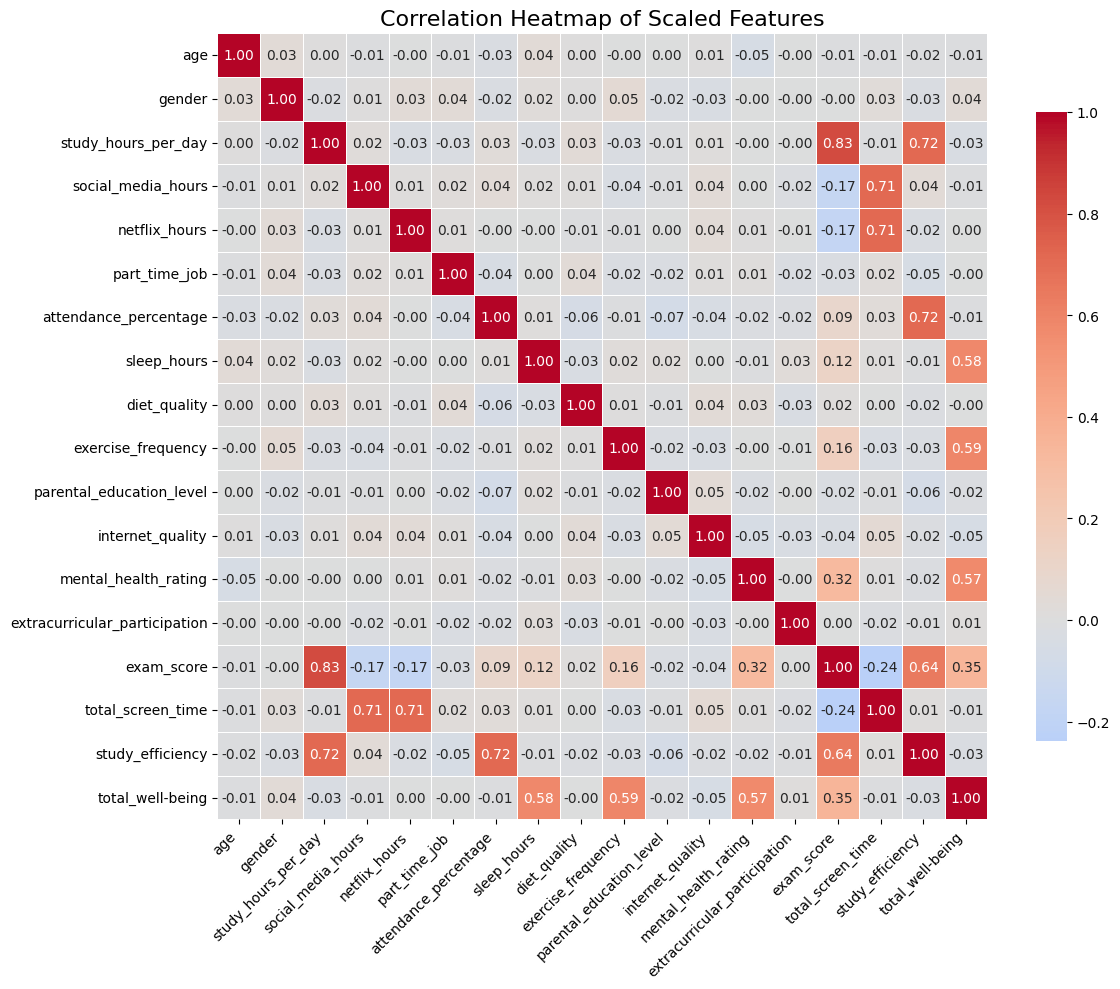

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    scaled_features.corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    center=0, linewidths=0.5, cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Scaled Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---

##4. Clustering

- Apply K-Means clustering using lifestyle features (excluding exam score)

- Determine optimal K using:
 - Elbow method (inertia plot)

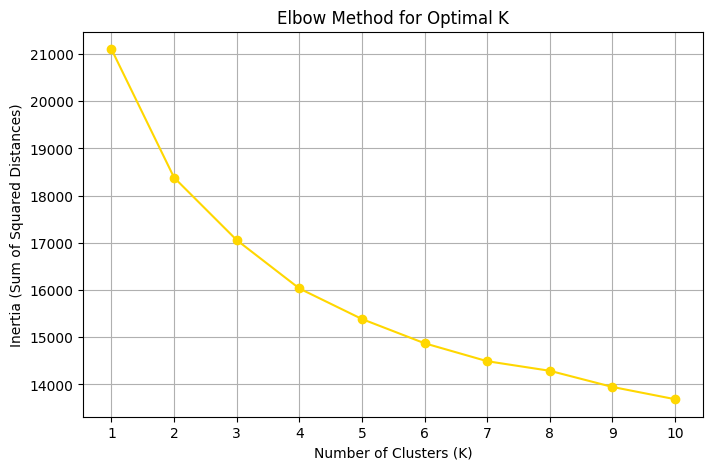

In [ ]:
# Create the DataFrame X by dropping 'exam_score' from scaled_features
X = scaled_features.drop(columns=['exam_score'])

# Elbow Method to determine optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Use X instead of X_scaled
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', color='gold')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

- Determine optimal K using:
  - Silhouette score

Silhouette Scores by Number of Clusters:


Number of Clusters (k)  Silhouette Score
0                       2              0.12
1                       3              0.10
2                       4              0.09
3                       5              0.08
4                       6              0.08
5                       7              0.07
6                       8              0.07
7                       9              0.06
8                      10              0.07

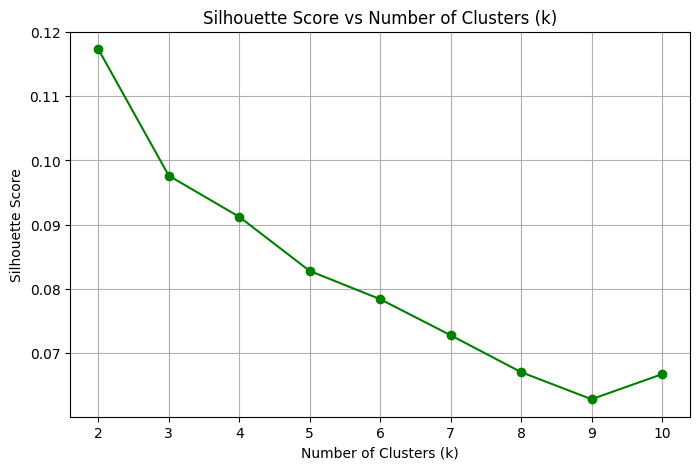

In [ ]:
# Test k from 2 to 10
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Create and display a clean table
score_table = pd.DataFrame({
    'Number of Clusters (k)': list(k_range),
    'Silhouette Score': silhouette_scores
})

print("Silhouette Scores by Number of Clusters:")
display(score_table)

# Plot in green
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

- Label and Describe each Cluster

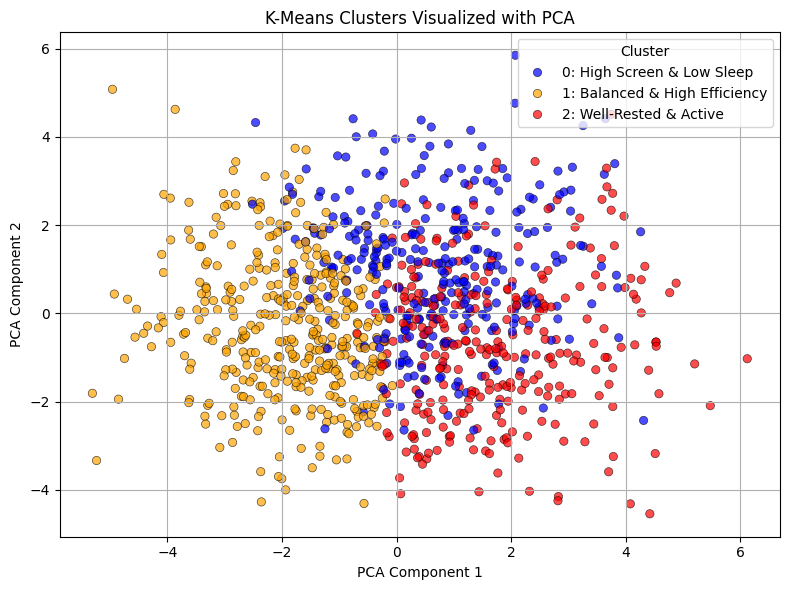

In [ ]:
# Define cluster label mapping (with number prefix)
cluster_label_map = {
    0: '0: High Screen & Low Sleep',
    1: '1: Balanced & High Efficiency',
    2: '2: Well-Rested & Active'
}

# Map cluster numbers to labels
scaled_features['cluster_label'] = scaled_features['cluster'].map(cluster_label_map)

# PCA results in DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = scaled_features['cluster_label']

# Custom palette
custom_palette = {
    '0: High Screen & Low Sleep': 'blue',
    '1: Balanced & High Efficiency': 'orange',
    '2: Well-Rested & Active': 'red'
}

# Define hue order explicitly
hue_order = ['0: High Screen & Low Sleep', '1: Balanced & High Efficiency', '2: Well-Rested & Active']

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2', hue='cluster_label',
    palette=custom_palette, hue_order=hue_order,
    edgecolor='black', alpha=0.7
)

plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

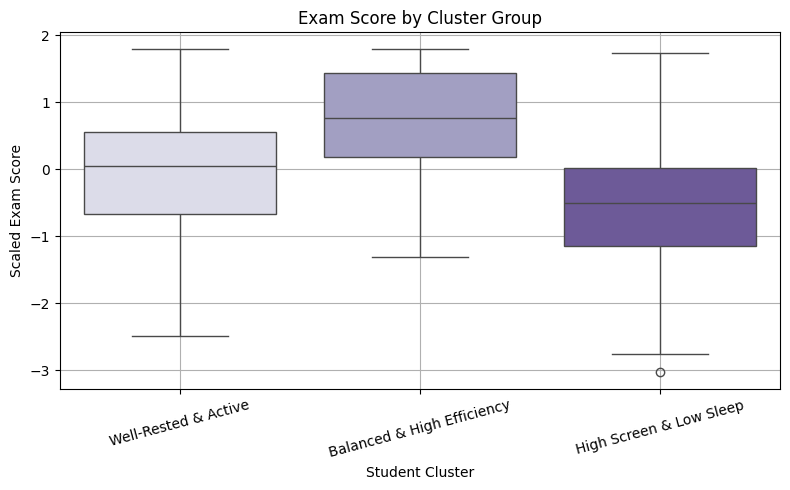

In [ ]:
# Define custom cluster labels again (if not already set)
cluster_labels = {
    0: 'High Screen & Low Sleep',
    1: 'Balanced & High Efficiency',
    2: 'Well-Rested & Active'
}
scaled_features['cluster_label'] = scaled_features['cluster'].map(cluster_labels)

# Use purple shades for the palette
purple_palette = sns.color_palette("Purples", n_colors=3)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='cluster_label',
    y='exam_score',
    hue='cluster_label',
    data=scaled_features,
    palette=purple_palette,
    legend=False
)

plt.title('Exam Score by Cluster Group')
plt.ylabel('Scaled Exam Score')
plt.xlabel('Student Cluster')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


---

## 5. Regression Analysis

- Linear Regression
  - (Splitting the dataset into 80% for training and 20% for testing)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare features and target
X_reg = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y_reg = scaled_features['exam_score']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train model
lr_reg = LinearRegression().fit(X_train, y_train)

# Display model info
lr_reg

LinearRegression()

- Evaluating the Linear Regression Model with Train/Test Split

In [ ]:
# Predict on test set
y_pred_reg = lr_reg.predict(X_test_reg)

# Validation metrics
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

# Display in a table
results_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Value': [round(mae_reg, 3), round(rmse_reg, 3), round(r2_reg, 3)]
})

print("Model Evaluation Results:")
display(results_table)


Model Evaluation Results:


Metric  Value
0       Mean Absolute Error (MAE)   0.25
1  Root Mean Squared Error (RMSE)   0.31
2                  R-squared (R²)   0.90

- Cross Validation

In [ ]:
# Define custom RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create custom scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Cross-validation scores
cv_r2 = cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring='r2')
cv_mae = -cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)  # negate for readability
cv_rmse = -cross_val_score(lr_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)  # negate for readability

# Create DataFrame to display results
cv_results = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'R² Score': np.round(cv_r2, 3),
    'MAE': np.round(cv_mae, 3),
    'RMSE': np.round(cv_rmse, 3)
})

# Add mean row
mean_row = pd.DataFrame({
    'Fold': ['Mean'],
    'R² Score': [np.round(cv_r2.mean(), 3)],
    'MAE': [np.round(cv_mae.mean(), 3)],
    'RMSE': [np.round(cv_rmse.mean(), 3)]
})

cv_results = pd.concat([cv_results, mean_row], ignore_index=True)

# Display the table
print("Cross-Validation Metrics Summary:")
display(cv_results)

Cross-Validation Metrics Summary:


Fold  R² Score  MAE  RMSE
0  Fold 1      0.89 0.24  0.31
1  Fold 2      0.91 0.25  0.32
2  Fold 3      0.89 0.25  0.33
3  Fold 4      0.90 0.26  0.32
4  Fold 5      0.89 0.27  0.32
5    Mean      0.90 0.25  0.32

- Result Visualization

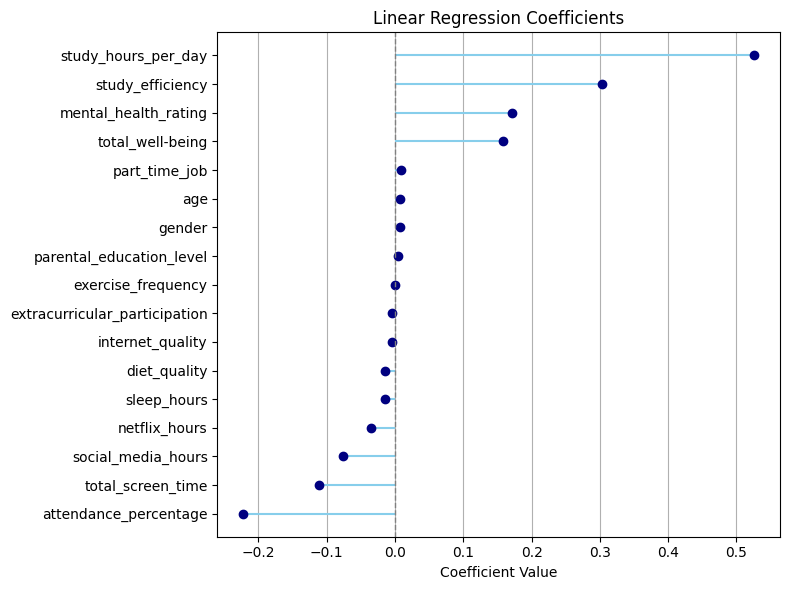

In [ ]:
# Assuming lr_reg is your trained LinearRegression model
# and X_reg is your training DataFrame (without the target)

# Step 1: Extract and sort coefficients
coef_reg = pd.Series(lr_reg.coef_, index=X_reg.columns).sort_values()

# Step 2: Lollipop Plot
plt.figure(figsize=(8, 6))
plt.hlines(y=coef_reg.index, xmin=0, xmax=coef_reg.values, color='skyblue')
plt.plot(coef_reg.values, coef_reg.index, "o", color='navy')
plt.axvline(0, color='gray', linewidth=1, linestyle='--')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

- Decision Tree Regressor
  - (Splitting the dataset into 80% for training and 20% for testing)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Prepare features and target
X_reg = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y_reg = scaled_features['exam_score']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Display model
tree_reg

DecisionTreeRegressor(random_state=42)

- Evaluating the Decision Tree Regressor Model with Train/Test Split

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from IPython.display import display

# R² Score
cv_r2_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring='r2')

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)

# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
cv_rmse_tree = cross_val_score(tree_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)

# Create a results DataFrame
tree_metrics_df = pd.DataFrame({
    'Metric': ['R² Score', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Score': [
        round(cv_r2_tree.mean(), 3),
        round(-cv_mae_tree.mean(), 3),
        round(-cv_rmse_tree.mean(), 3)
    ]
})

# Display results
display(tree_metrics_df)


Metric  Score
0                        R² Score   0.71
1       Mean Absolute Error (MAE)   0.41
2  Root Mean Squared Error (RMSE)   0.53

- Model Visualization

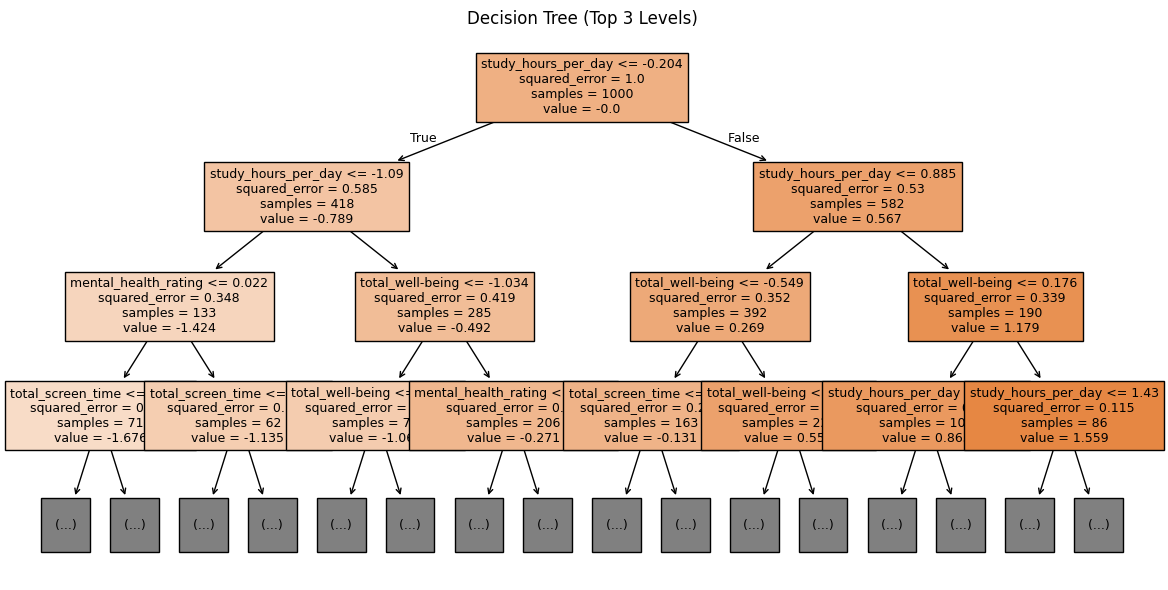

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the decision tree model if not already fitted
tree_reg.fit(X_reg, y_reg)

# Plot the decision tree (top 3 levels)
plt.figure(figsize=(12, 6))
plot_tree(tree_reg, feature_names=X_reg.columns, filled=True, max_depth=3, fontsize=9)
plt.title("Decision Tree (Top 3 Levels)")
plt.tight_layout()
plt.show()

- Evaluating the Decision Tree Regressor Model with (GridCV DecisionTreeRegressor)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold CV
grid_cv = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Fit grid search
grid_cv.fit(X_reg, y_reg)

# Best model and predictions
best_tree_reg = grid_cv.best_estimator_
y_pred_best = best_tree_reg.predict(X_test_reg)

# Evaluation metrics
results = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Score": [
        mean_absolute_error(y_test_reg, y_pred_best),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_best)),
        r2_score(y_test_reg, y_pred_best)
    ]
}).round(3)

# Display the results
display(results)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


Metric  Score
0       MAE   0.21
1      RMSE   0.28
2  R² Score   0.92

- Model Visualization with (GridCV DecisionTreeRegressor)

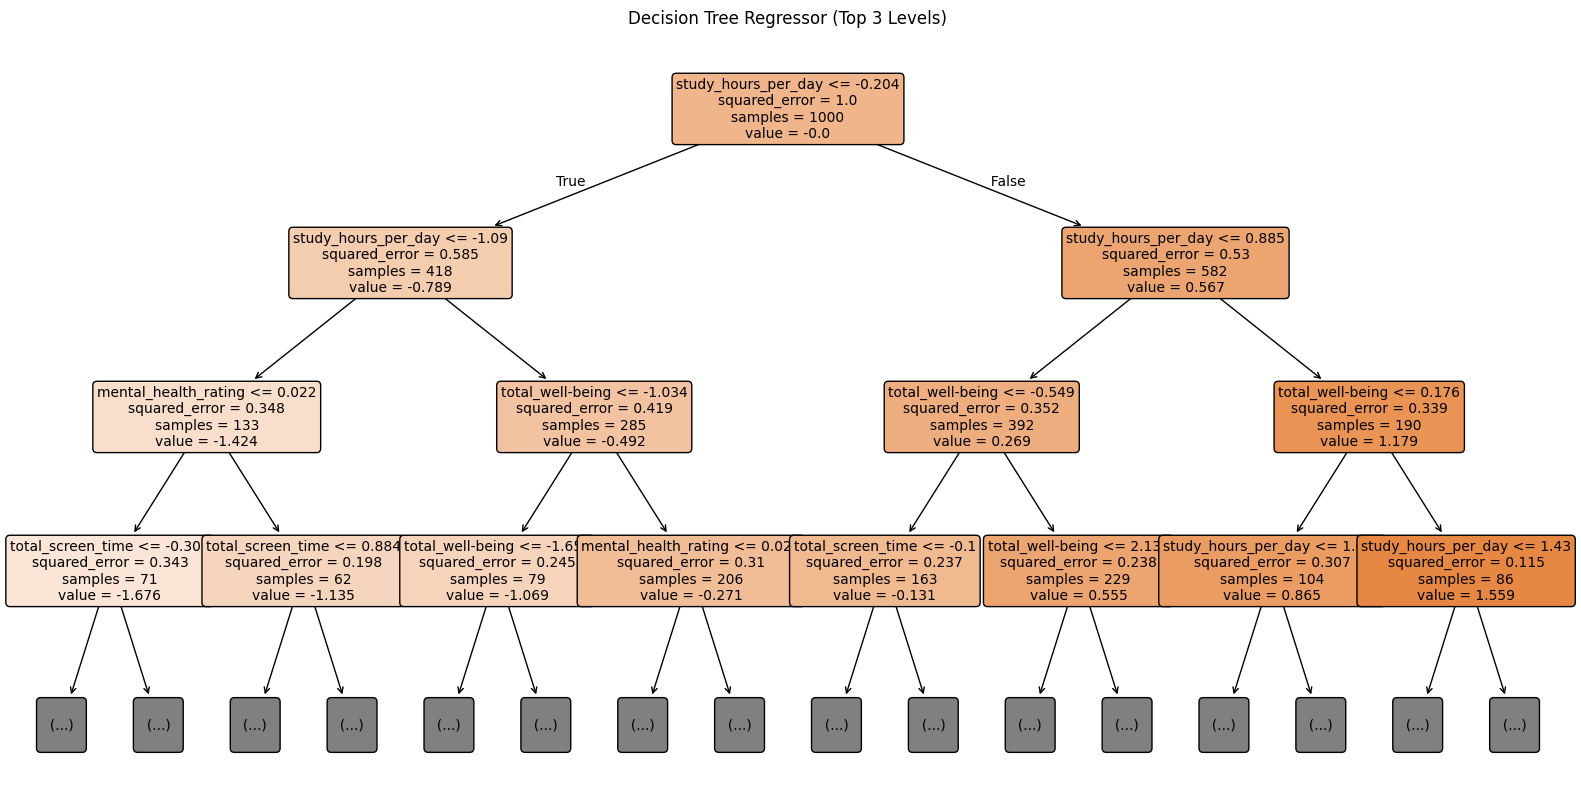

In [ ]:
best_tree = grid_cv.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_reg.columns,
    filled=True,
    rounded=True,
    max_depth=3,          # Show only top 3 levels for readability
    fontsize=10
)
plt.title("Decision Tree Regressor (Top 3 Levels)")
plt.show()

- Random Forest Regressor
   - (Splitting the dataset into 80% for training and 20% for testing)

In [ ]:
# Split data: 80% training, 20% testing
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Initialize and train Random Forest on training data
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_reg.fit(X_train_rf, y_train_rf)

# Display model
rf_reg.fit(X_reg, y_reg)

RandomForestRegressor(n_jobs=-1, random_state=42)

- Evaluating the Random Forest Regressor Model with Train/Test Split

In [ ]:
# Predict and evaluate
y_pred_rf = rf_reg.predict(X_test_reg)
mae_rf_test = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf_test = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf_test = r2_score(y_test_reg, y_pred_rf)

# Create and display the results table
rf_results = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Score": [mae_rf_test, rmse_rf_test, r2_rf_test]
}).round(3)

display(rf_results)

Metric  Score
0       MAE   0.10
1      RMSE   0.12
2  R² Score   0.98

- Evaluating the Model (Random Forest Regressor Cross-Validation)

In [ ]:
# R²
cv_r2_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring='r2')

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring=mae_scorer)

# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)
cv_rmse_rf = cross_val_score(rf_reg, X_reg, y_reg, cv=5, scoring=rmse_scorer)

# Results Table
cv_results_rf = pd.DataFrame({
    "Metric": ["R² (Mean)", "MAE (Mean)", "RMSE (Mean)"],
    "Score": [cv_r2_rf.mean(), -cv_mae_rf.mean(), -cv_rmse_rf.mean()]
}).round(3)

display(cv_results_rf)

Metric  Score
0    R² (Mean)   0.87
1   MAE (Mean)   0.28
2  RMSE (Mean)   0.35

In [ ]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up grid search
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_rf.fit(X_reg, y_reg)
best_rf = grid_rf.best_estimator_

# Display best parameters and best score
results_rf = pd.DataFrame({
    "Best Parameters": [grid_rf.best_params_],
    "Best CV RMSE": [-grid_rf.best_score_]
})

display(results_rf)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best Parameters  Best CV RMSE
0  {'max_depth': None, 'min_samples_leaf': 1, 'mi...          0.35

- Model Evaluation (Random Forest Regressor Grid Search Cross-Validation)

In [ ]:
# Predict using the best model from GridSearchCV
y_pred_best_rf = best_rf.predict(X_test_reg)

# Compute metrics
mae_best_rf = mean_absolute_error(y_test_reg, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_rf))
r2_best_rf = r2_score(y_test_reg, y_pred_best_rf)

# Create DataFrame for clean display
rf_eval_results = pd.DataFrame({
    "Model": ["Best Random Forest (GridSearchCV)"],
    "MAE": [mae_best_rf],
    "RMSE": [rmse_best_rf],
    "R² Score": [r2_best_rf]
})

# Display
display(rf_eval_results.round(3))

Model  MAE  RMSE  R² Score
0  Best Random Forest (GridSearchCV) 0.10  0.12      0.98

- Model Visualization (Random Forest Regressor)

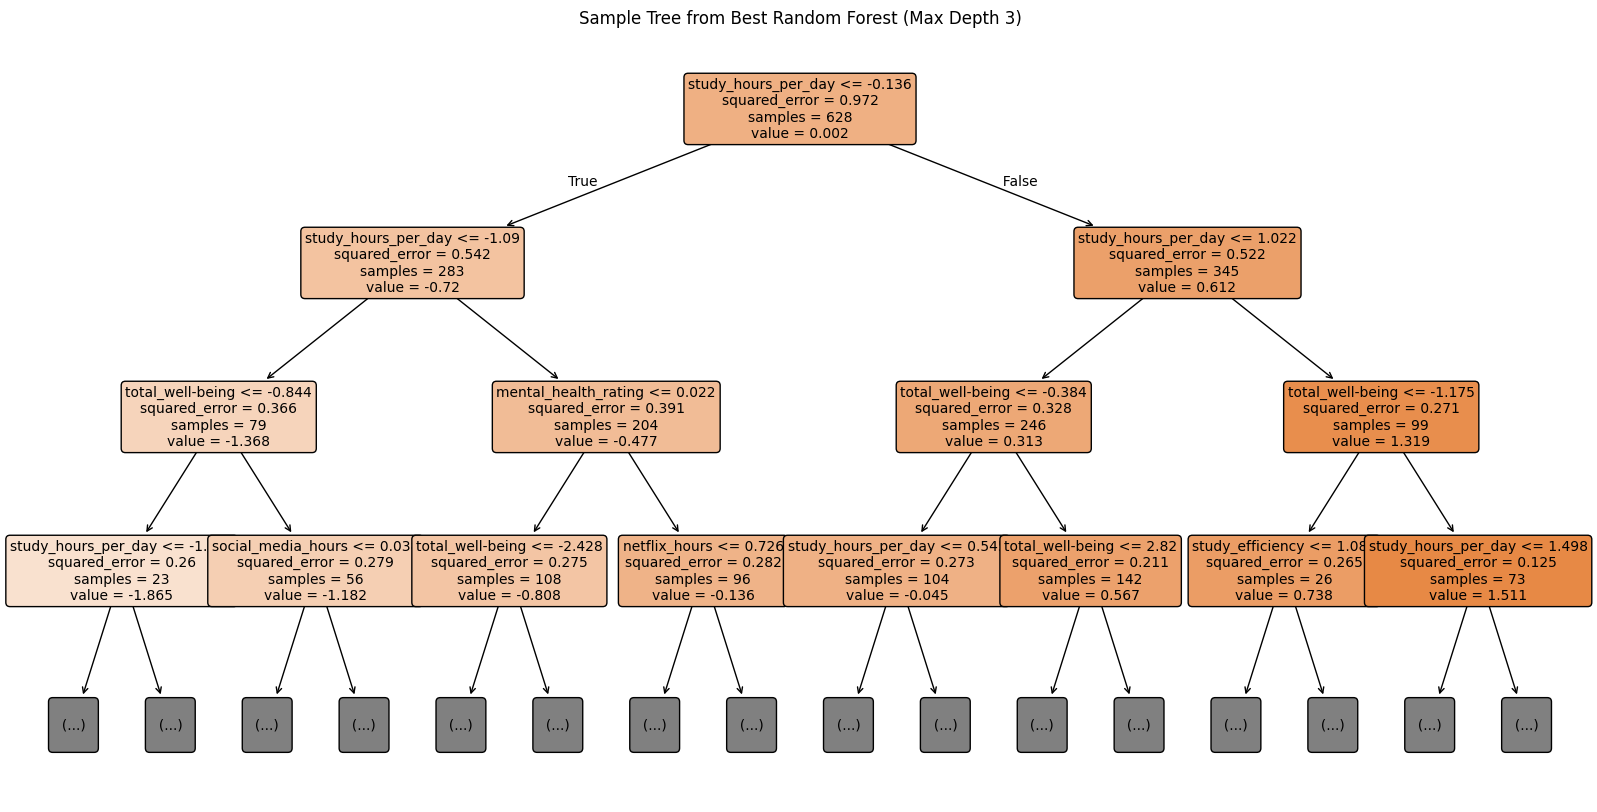

In [ ]:
# Pick one tree from the Random Forest
sample_tree = best_rf.estimators_[0]

# Plot the tree (max depth 3 for clarity)
plt.figure(figsize=(20, 10))
plot_tree(
    sample_tree,
    feature_names=X_reg.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Sample Tree from Best Random Forest (Max Depth 3)")
plt.show()

- Random Forest Feature Importance

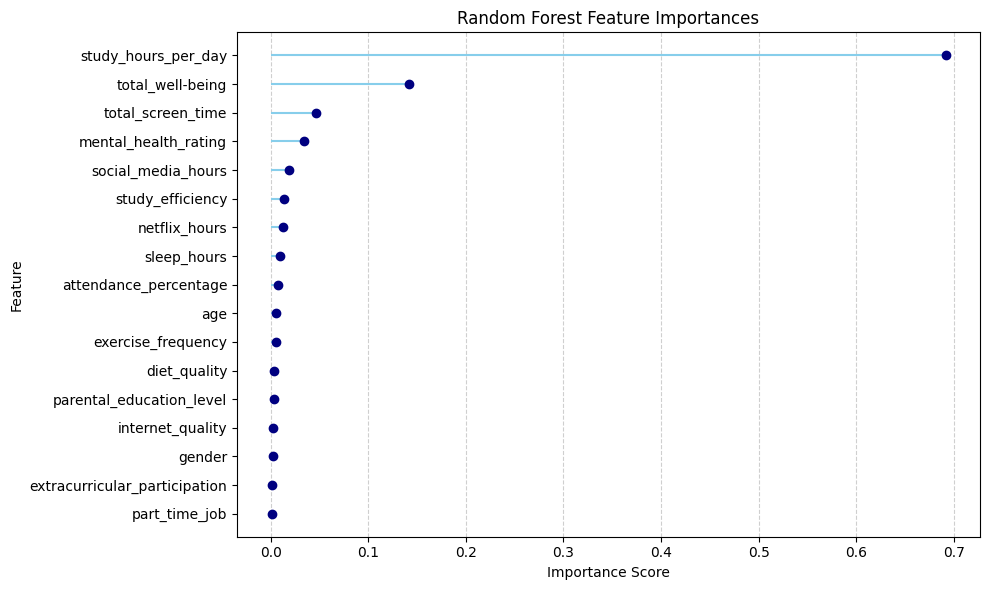

In [ ]:
import matplotlib.pyplot as plt

# Get the best estimator and its importances
best_rf = grid_rf.best_estimator_
importances = pd.Series(best_rf.feature_importances_, index=X_reg.columns).sort_values()

# Lollipop chart
plt.figure(figsize=(10, 6))
plt.hlines(y=importances.index, xmin=0, xmax=importances.values, color='skyblue')
plt.plot(importances.values, importances.index, 'o', color='navy')

plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 6. Classification Task (Optional)

In [ ]:
# Compute thresholds based on percentiles
lower_bound = scaled_features['exam_score'].quantile(0.33)
upper_bound = scaled_features['exam_score'].quantile(0.67)

# Define function to assign group
def performance_tier(score):
    if score <= lower_bound:
        return 'Low'
    elif score <= upper_bound:
        return 'Average'
    else:
        return 'High'

# Apply and add column
scaled_features['performance_group'] = scaled_features['exam_score'].apply(performance_tier)
scaled_features['performance_group'].value_counts(normalize=True)

performance_group
Average   0.34
Low       0.33
High      0.33
Name: proportion, dtype: float64

In [ ]:
# Features and target
X_class = scaled_features.drop(columns=['exam_score', 'cluster', 'cluster_label', 'performance_group'], errors='ignore')
y_class = LabelEncoder().fit_transform(scaled_features['performance_group'])

# Train-test split and scaling
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

In [ ]:
clf_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

clf_results = {}
for name, model in clf_models.items():
    X_tr, X_te = (X_train_clf_scaled, X_test_clf_scaled) if name == 'LogReg' else (X_train_clf, X_test_clf)
    model.fit(X_tr, y_train_clf)
    preds = model.predict(X_te)
    scores = cross_val_score(model, X_tr, y_train_clf, cv=5, scoring='accuracy')

    clf_results[name] = {
        'Accuracy': accuracy_score(y_test_clf, preds),
        'F1_Score': f1_score(y_test_clf, preds, average='weighted'),
        'CV_Mean': scores.mean(),
        'CV_Std': scores.std()
    }

In [ ]:
import pandas as pd
from IPython.display import display

# Convert results to DataFrame
results_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': result['Accuracy'],
        'F1 Score': result['F1_Score'],
        'CV Accuracy Mean': result['CV_Mean'],
        'CV Accuracy Std': result['CV_Std']
    }
    for name, result in clf_results.items()
])

# Round for neatness
results_df = results_df.round(3)

# Display table
display(results_df)

Model  Accuracy  F1 Score  CV Accuracy Mean  CV Accuracy Std
0  Logistic Regression      0.78      0.77              0.82             0.02
1        Decision Tree      0.71      0.71              0.74             0.02
2        Random Forest      0.72      0.72              0.79             0.02

In [ ]:
import pandas as pd
from IPython.display import display

# Create summary DataFrame
clf_results_df = pd.DataFrame({
    'Model': list(clf_results.keys()),
    'Accuracy': [clf_results[m]['Accuracy'] for m in clf_results.keys()],
    'F1 Score': [clf_results[m]['F1_Score'] for m in clf_results.keys()],
    'CV Accuracy Mean': [clf_results[m]['CV_Accuracy_Mean'] for m in clf_results.keys()],
    'CV Accuracy Std': [clf_results[m]['CV_Accuracy_Std'] for m in clf_results.keys()]
}).round(3)

# Display the clean table
display(clf_results_df.style.set_caption("Classification Model Performance Comparison").format(precision=3))

# Identify the best model by Accuracy
best_clf_model = clf_results_df.loc[clf_results_df['Accuracy'].idxmax(), 'Model']
print(f"\nBest Classification Model: {best_clf_model}")


Best Classification Model: Logistic Regression


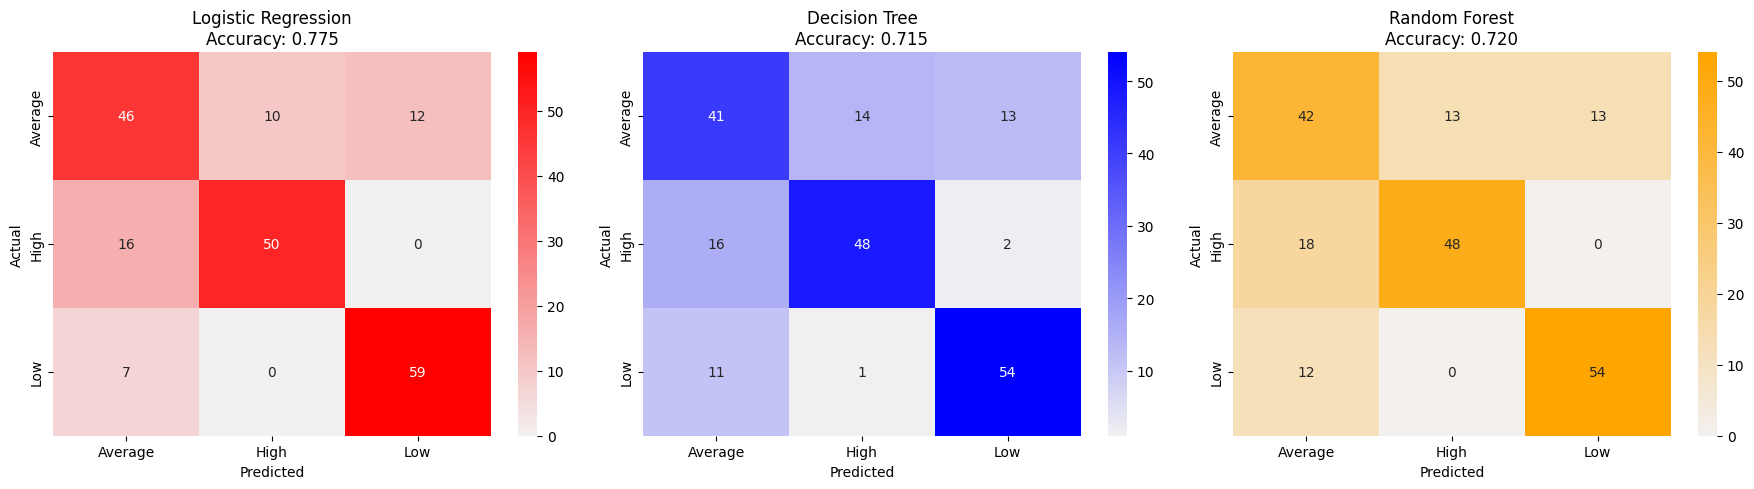

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Custom colormaps per model
cmap_dict = {
    'Logistic Regression': sns.light_palette("red", as_cmap=True),
    'Decision Tree': sns.light_palette("blue", as_cmap=True),
    'Random Forest': sns.light_palette("orange", as_cmap=True)
}

# Create subplots
fig, axes = plt.subplots(1, len(clf_results), figsize=(6 * len(clf_results), 5))
class_names = le_target.classes_

# Ensure axes is iterable even with one model
if len(clf_results) == 1:
    axes = [axes]

# Plot confusion matrix per model with custom colors
for i, (name, result) in enumerate(clf_results.items()):
    cm = confusion_matrix(y_test_clf, result['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d',
                cmap=cmap_dict.get(name, 'Blues'),
                xticklabels=class_names,
                yticklabels=class_names,
                ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {result["Accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
from IPython.display import display

# Best model details
best_clf_model = max(clf_results.keys(), key=lambda x: clf_results[x]['Accuracy'])
best_clf_result = clf_results[best_clf_model]

# Generate classification report as a dictionary
report_dict = classification_report(
    y_test_clf,
    best_clf_result['Predictions'],
    target_names=class_names,
    output_dict=True
)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose().round(3)

# Display title and table
print(f"\nDetailed Classification Report - Best Model ({best_clf_model}):")
display(report_df)


Detailed Classification Report - Best Model (Logistic Regression):


precision  recall  f1-score  support
Average            0.67    0.68      0.67    68.00
High               0.83    0.76      0.79    66.00
Low                0.83    0.89      0.86    66.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.78    0.78      0.78   200.00
weighted avg       0.78    0.78      0.77   200.00

## IV. Interpretation and Insights
This section summarizes the insights gained from data analysis, clustering, and model training processes. It combines statistical evidence, visualization interpretations, and model behavior to extract meaningful conclusions about the factors influencing student academic performance based on lifestyle choices.


### A. Feature Importance
Understanding which features most significantly influence academic performance is key to drawing actionable insights. We evaluated feature importance from both linear and tree-based models.


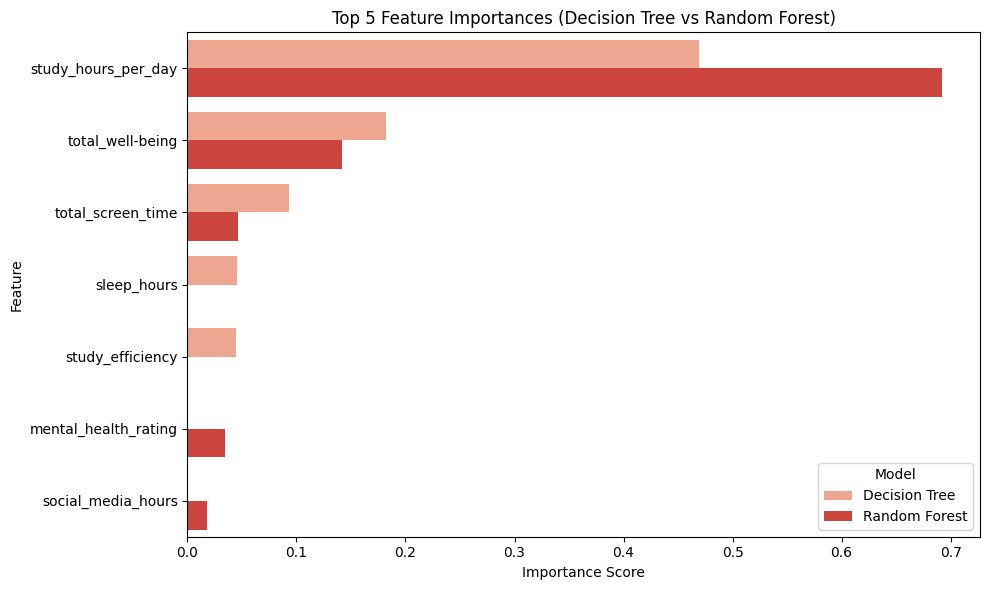

In [ ]:
# Step 1: Extract feature importances
dt_importances = pd.Series(best_tree_cls.feature_importances_, index=X_class.columns)
rf_importances = pd.Series(best_rf.feature_importances_, index=X_class.columns)

# Step 2: Top 5 from each
top5_dt = dt_importances.sort_values(ascending=False).head(5)
top5_rf = rf_importances.sort_values(ascending=False).head(5)

# Step 3: Prepare DataFrame
df_plot = pd.concat([
    top5_dt.rename('Importance').to_frame().assign(Model='Decision Tree'),
    top5_rf.rename('Importance').to_frame().assign(Model='Random Forest')
]).reset_index().rename(columns={'index': 'Feature'})

# Step 4: Plot with red tones
plt.figure(figsize=(10, 6))
red_palette = sns.color_palette("Reds", n_colors=2)
sns.barplot(data=df_plot, x='Importance', y='Feature', hue='Model', palette=red_palette)
plt.title("Top 5 Feature Importances (Decision Tree vs Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

1. study_hours_per_day dominates importance
- This feature is by far the most influential in both models.
- In Random Forest, it has the highest importance — much more than in the Decision Tree.
 - ➤ Interpretation: How much a student studies per day is the strongest predictor of exam performance.

2. total_well-being is moderately important
- Ranked second for both models, but slightly more important in the Decision Tree.
 - ➤ Interpretation: Well-being is a notable predictor. Higher well-being likely contributes to better academic focus and consistency.

3. total_screen_time shows lower importance
- This factor is relevant but less influential than study habits and well-being.
- Slightly more weight is given in the Decision Tree model.
 - ➤ Interpretation: Screen time matters but may only impact performance indirectly (e.g., via distraction or sleep loss).

4. Other features like sleep_hours, study_efficiency, and mental_health_rating are less impactful
- These are included but contribute minimally in both models.
- Sleep and efficiency have some value in the Decision Tree but are nearly ignored by the Random Forest.
  - ➤ Interpretation: While important for health and productivity, these features may not vary enough across students or may be captured indirectly by other metrics like well-being.

5. social_media_hours has almost no importance
- Consistently the least important feature in both models.
  - ➤ Interpretation: Time on social media may not be a strong direct indicator of academic performance compared to study habits.


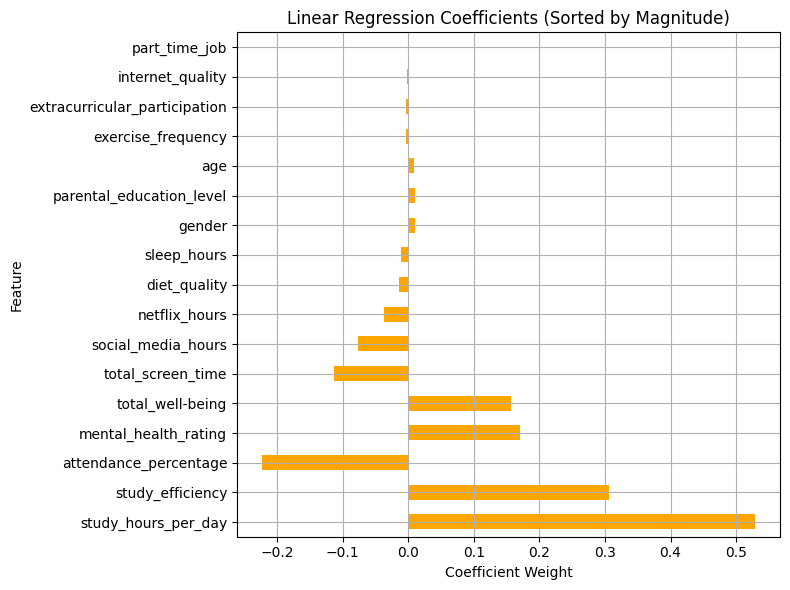

In [ ]:
# Sort coefficients by absolute value (magnitude)
coef_reg = pd.Series(lr_reg.coef_, index=X_reg.columns).sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 6))
coef_reg.plot(kind='barh', color='orange')  # changed to orange
plt.title('Linear Regression Coefficients (Sorted by Magnitude)')
plt.xlabel('Coefficient Weight')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients represent the strength and direction of the relationship between each feature and the exam score:

- Positive Coefficient → Higher feature value increases exam score.
- Negative Coefficient → Higher feature value decreases exam score.
- Larger Magnitude → Greater influence on the prediction.

Top Positively Influential Features

 *1. study_hours_per_day*
- Interpretation: Most influential predictor across both plots. Students who study more tend to score higher.
- Strong, consistent positive correlation with performance.

*2. study_efficiency*
- Interpretation: Quality of study matters almost as much as quantity. Efficient study habits significantly boost scores.

*3. mental_health_rating & total_well-being*
- Interpretation: Students with better mental and overall well-being perform better. Indicates emotional and physical health are essential for academic success.

*4. attendance_percentage (in second plot only)*
- Interpretation: Students who attend class more frequently perform better. Strong positive weight shows the importance of presence and participation.



Negatively Influential Features

*5. total_screen_time, social_media_hours, netflix_hours*
- Interpretation: Excessive screen time, especially entertainment-based (Netflix, social media), negatively affects performance. Distractions reduce available study time and disrupt focus/sleep patterns.

Features with Minimal Influence

*6. Examples: gender, age, parental_education_level, extracurricular_participation, exercise_frequency, internet_quality*
- Interpretation: These features have negligible impact on scores in this model. May still matter contextually, but do not significantly shift predictions statistically in this dataset.

### B. Cluster Profiling
Using K-Means clustering on lifestyle features (excluding exam score), we identified three distinct student profiles. Each cluster represents a behavioral archetype among students.


In [ ]:
#Average Exam Score Grouped by Cluster
scaled_features.groupby('cluster_label')['exam_score'].mean().round(3)

Cluster Label  Average Exam Score
0     High Screen & Low Sleep               -0.28
1  Balanced & High Efficiency                0.50
2        Well-Rested & Active                0.42

**Cluster Analysis & Behavioral Insights**

Cluster 0: High Screen & Low Sleep
- Average Exam Score: -0.28
- Behaviors:
 - High total_screen_time (heavy use of Netflix and social media)
  - Low total_well-being (indicates low sleep, low exercise, or poor mental health)
  - lower study_efficiency (fewer study hours or poor attendance)
- Interpretation:
 - ➤ Students in this group appear distracted, possibly tired and disengaged. Their high screen time and poor well-being lead to the lowest academic performance.

Cluster 1: Balanced & High Efficiency
- Average Exam Score: 0.50
- Behaviors:
  - Moderate to low total_screen_time
  - High study_efficiency (studies more and attends regularly)
 - Balanced total_well-being
- Interpretation:
 - ➤ This group exhibits strong academic habits, with a balance between health and productivity. Their efficient study behaviors lead to the best exam outcomes.

Cluster 2: Well-Rested & Active
- Average Exam Score: 0.42
- Behaviors:
  - Lower total_screen_time
  - Moderate study_efficiency
 - High total_well-being (good sleep, exercise, and mental health)
- Interpretation:
 - ➤ These students prioritize health and rest, contributing to solid academic performance. While not as focused on study efficiency as Cluster 1, their lifestyle supports learning.

Patterns Observed
- Screen time ↘ = Exam score ↗
 - Excessive screen time hurts academic performance.
- Efficiency & Attendance ↗ = Exam score ↗
 - Students who study regularly and attend classes perform best.
- Well-being ↗ = Resilience & Better Scores
 - Rest, mental health, and physical activity provide a strong academic foundation.

### C. Model Performance
Three supervised learning models were used to predict exam scores:

Model Comparison

| Model                           | Mean R² | Mean MAE | Mean RMSE |
|----------------------------------|---------|----------|-----------|
| **Linear Regression (CV)**       | 0.90   | 0.25   | 0.31     |
| **Decision Tree Regressor (CV)** | 0.71  | 0.41    | 0.53     |
| **Decision Tree (GridSearchCV)** | 0.92       | 0.21        | 0.28     |
| **Random Forest Regressor (CV)** | 0.87   | 0.28    | 0.35    |
| **Random Forest (GridSearchCV, Test Set)** | **0.98** | **0.10** | **0.12** |




Model Evaluation Summary
- From the table provided, we’re comparing four models using the following metrics:
  - R² (Coefficient of Determination): Higher is better (closer to 1)
  - MAE (Mean Absolute Error): Lower is better
  - RMSE (Root Mean Square Error): Lower is better

 Best Performing Model:
- **Random Forest (GridSearchCV, Test Set)**
  - R²: 0.98 (highest)
  - MAE: 0.10 (lowest)
  - RMSE: 0.12 (lowest)

- Why?
 - This model has the best overall performance in terms of both accuracy (R²) and error reduction (MAE and RMSE). It generalizes well on the test set after tuning.

Trade-offs: Accuracy vs. Interpretability

| Model                    | Accuracy     | Interpretability   |
|--------------------------|--------------|---------------------|
| Linear Regression        | High         | Very High ✅         |
| Decision Tree (CV)       | Medium       | High                |
| Decision Tree (Tuned)    | High         | Medium              |
| Random Forest (CV/Tuned) | Very High ✅ | Low ❌              |


Interpretation:
- **Linear Regression** is the most interpretable — coefficients clearly show feature influence. But it's slightly less accurate than tuned trees/forests.
- **Random Forest** has superior accuracy but is a black box — hard to explain why predictions are made without deeper model inspection (like feature importance or SHAP).
- **Decision Tree** is in the middle — interpretable via tree paths, but less accurate unless finely tuned.

**Conclusion:**

- If accuracy is the top priority, use Random Forest with GridSearchCV.
- If explainability is critical, consider Linear Regression or a Decision Tree.

### D. Real-World Implications

Achieving academic success is not merely the product of increased study hours or last-minute cramming sessions. Rather, research and observational data emphasize the necessity of a balanced and multi-dimensional approach that addresses both academic responsibilities and personal well-being. Academic performance is significantly shaped by a constellation of interrelated factors, including mental health, sleep quality, screen time habits, physical health, and lifestyle choices. This document consolidates empirical findings and expert insights into a comprehensive set of recommendations that students can adopt to enhance their academic success while maintaining overall wellness.



**1. Prioritize Study Time and Class Attendance**
<br> Effective study habits and regular class attendance remain among the strongest predictors of academic success. Students who consistently allocate structured time for studying and avoid procrastination are more likely to retain information and understand complex concepts. Attending class is not merely about absorbing lectures; it also facilitates engagement with instructors, collaborative learning opportunities, and real-time clarification of doubts. Conversely, habitual absenteeism can lead to gaps in foundational knowledge, missed announcements or deadlines, and declining academic confidence—all of which compound over time and adversely affect performance.

**2. Preserve and Promote Mental Health**
<br>Mental health has emerged as a critical determinant of academic performance. Students who experience high levels of stress, anxiety, or depression often struggle with concentration, memory retention, and motivation. Studies consistently show that those with stronger emotional well-being tend to achieve higher academic outcomes. Institutions and students alike must prioritize access to counseling services, peer support systems, and mental wellness programs. Techniques such as mindfulness, regular physical activity, and healthy social interactions can also serve as protective factors that bolster resilience and academic motivation.

**3. Ensure Adequate and Consistent Sleep**
<br>Sleep is a foundational yet frequently overlooked pillar of cognitive functioning. Research demonstrates that students who regularly get sufficient sleep perform significantly better on memory-based tasks, problem-solving exercises, and exams. Contrary to the belief that sacrificing sleep for additional study hours yields better results, data reveals that sleep deprivation often undermines learning, impairs attention, and increases the likelihood of burnout. Sleep supports memory consolidation, emotional regulation, and overall mental clarity—making it indispensable for sustained academic success.

**4. Manage and Limit Screen Time—Especially for Non-Academic Purposes**
<br>The pervasiveness of digital devices in student life presents both opportunities and challenges. While technology can enhance learning, excessive and unstructured screen time—particularly on social media platforms and streaming services—has shown a strong negative correlation with academic performance. Even moderate non-academic screen use can erode attention spans, disrupt sleep due to prolonged blue light exposure, and reduce time available for productive tasks. Students are advised to implement screen time management strategies, such as using time-limiting apps or scheduling specific hours for recreational use.

**5. Maintain a Nutrient-Rich, Balanced Diet**
<br>Cognitive function and academic performance are closely tied to physical health, particularly nutrition. A diet that includes fruits, vegetables, whole grains, lean proteins, and healthy fats supports optimal brain function, sustained energy levels, and emotional stability. Conversely, irregular meals or over-reliance on processed foods can result in fatigue, mood swings, and diminished academic output. Students should treat proper nutrition not as a luxury, but as a non-negotiable component of their academic toolkit.

**6. Adopt a Balanced Lifestyle Integrating Physical, Mental, and Academic Health**
<br>The most academically successful students are often not those who study the most, but those who maintain balance across key aspects of life. Data indicates that the highest-performing student cluster combined moderate and effective study routines with adequate sleep, limited screen use, and strong mental well-being. This reinforces the notion that academic excellence stems from strategic, rather than excessive, effort. Time management, setting priorities, and integrating short breaks and recreational activities can significantly boost productivity and prevent burnout.

#### Surprising and Counterintuitive Findings
Research has also uncovered a series of unexpected trends that challenge common assumptions about academic achievement:
1. **More Study Time Does Not Always Translate to Better Grades:** <br>Contrary to popular belief, students who dedicated long hours to studying—while neglecting sleep, nutrition, or mental health—did not show significant academic improvement. This underscores the importance of study quality and overall well-being over sheer quantity of hours.

2.  **The Negative Impact of Screen Time Was Stronger Than Expected:** <br>Even relatively minor increases in unproductive screen time had a measurable adverse effect on academic performance. The cumulative impact of digital distractions on focus, sleep, and time management was more profound than many students anticipated.

3. **Mental and Physical Wellness Can Offset Moderate Study Time:** <br>Some students who did not study excessively still achieved high academic results, provided they maintained excellent mental health, consistent sleep schedules, and a healthy diet. These findings suggest that a well-rounded lifestyle can compensate for fewer study hours, provided those hours are used effectively.

4. **Part-Time Work Requires Strategic Time Management:** <br> While part-time employment can offer financial and experiential benefits, it has been associated with a slight decline in academic performance. This is likely due to increased fatigue and time constraints. Students who work alongside studying must be especially deliberate in managing their schedules and prioritizing self-care.

5.  **Physical Activity Alone Is Not a Guarantee of Academic Success:** <br>Although exercise has undeniable cognitive and psychological benefits, it did not correlate directly with academic performance unless paired with other factors like quality sleep and sound mental health.



# Conclusion
In conclusion, academic success is not a one-dimensional pursuit dependent solely on study intensity. Instead, it emerges from a thoughtful integration of multiple life domains, including mental health, sleep hygiene, nutrition, screen discipline, and strategic learning. Students are encouraged to approach their education as a marathon rather than a sprint—one that demands resilience, self-awareness, and a holistic perspective. By fostering a balanced lifestyle and aligning daily habits with long-term goals, students can not only achieve academic excellence but also preserve their overall well-being throughout their educational journey.